# Load dataset

In [ ]:
!pip install kaggle

In [ ]:
import os
import zipfile

def download_data_from_kaggle():
    try:
        from google.colab import files
        uploaded = files.upload()
    except ImportError:
        print("Running outside of Colab. Please ensure your kaggle.json is in ~/.kaggle/")

    if 'kaggle.json' in os.listdir('.'):
        !mkdir -p ~/.kaggle
        !mv kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    else:
        print("kaggle.json not found. Please upload it or place it in the correct directory.")

    if not os.path.exists('cpe342-karena.zip'):
        print("Downloading data from Kaggle competition 'cpe342-karena'...")
        !kaggle competitions download -c cpe342-karena
    else:
        print("Data already downloaded.")

    if os.path.exists('cpe342-karena.zip'):
        print("Unzipping data...")
        try:
            with zipfile.ZipFile('cpe342-karena.zip', 'r') as zip_ref:
                zip_ref.extractall('.')
            print("Data unzipped.")
        except zipfile.BadZipFile:
            print("Error: Downloaded file is not a valid zip file.")
        except Exception as e:
            print(f"An error occurred during unzipping: {e}")
    else:
        print("Zip file not found, cannot unzip.")

In [ ]:
download_data_from_kaggle()

Saving kaggle.json to kaggle.json
 99% 906M/920M [00:07<00:00, 42.9MB/s]
100% 920M/920M [00:07<00:00, 121MB/s] 
Unzipping data...
Data unzipped.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Raw data EDA

In [ ]:
df = pd.read_csv('task2/train.csv')

In [ ]:
df.head()

id player_id  play_frequency  avg_session_duration  \
0  PLY00001   P050236        5.495437             24.837349   
1  PLY00002   P108696        9.991089             88.376322   
2  PLY00003   P113532       14.234225            101.712292   
3  PLY00004   P123930        3.373683            191.975841   
4  PLY00005   P068623       22.469353             28.042509   

   total_playtime_hours  login_streak  days_since_last_login  \
0           2740.945124          60.0              56.034052   
1                   NaN          22.0              75.036888   
2           2828.479467          66.0                    NaN   
3           1915.082950          80.0               0.127910   
4            517.921948           NaN              45.078460   

   total_spending_thb  avg_monthly_spending  spending_frequency  ...  \
0        58219.915660            434.038311           17.790970  ...   
1        28966.163953           4233.532935           28.862134  ...   
2        44478.823835           4849.491895           22.536406  ...   
3        57074.116993           6863.516123           10.565666  ...   
4                 NaN           4408.101247           11.226504  ...   

   platform  device_type  payment_method  language  account_status  \
0        PC        Phone          Wallet        DE          Active   
1   Console      Desktop            Card        ES         Dormant   
2        PC       Laptop             NaN        EN         Dormant   
3   Console       Tablet             NaN        ES         Dormant   
4        PC       Tablet            Gift        EN          Active   

   player_type_tag  engagement_level  loyalty_tier  skill_tier  segment  
0           Social               Low        Silver         NaN        0  
1        Collector               Low      Platinum        Gold        2  
2           Casual              High       Diamond        Gold        3  
3      Competitive           Veteran        Silver        Gold        3  
4           Casual               Mid        Silver         NaN        1  

[5 rows x 47 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101658 entries, 0 to 101657
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                101658 non-null  object 
 1   player_id                         101658 non-null  object 
 2   play_frequency                    93785 non-null   float64
 3   avg_session_duration              93771 non-null   float64
 4   total_playtime_hours              93887 non-null   float64
 5   login_streak                      93938 non-null   float64
 6   days_since_last_login             93878 non-null   float64
 7   total_spending_thb                93902 non-null   float64
 8   avg_monthly_spending              93923 non-null   float64
 9   spending_frequency                93898 non-null   float64
 10  friend_count                      93720 non-null   float64
 11  team_play_percentage              93963 non-null   f

In [ ]:
df.describe().T

count          mean           std  \
play_frequency                     93785.0     12.162113      7.112615   
avg_session_duration               93771.0    107.922960     54.461009   
total_playtime_hours               93887.0   1706.987371    939.497982   
login_streak                       93938.0     55.095968     35.385126   
days_since_last_login              93878.0     45.917386     20.763590   
total_spending_thb                 93902.0  34156.914790  22008.333299   
avg_monthly_spending               93923.0   3304.075003   1929.848230   
spending_frequency                 93898.0     17.000950      9.602913   
friend_count                       93720.0    107.292168     65.017491   
team_play_percentage               93963.0     50.226549     19.707257   
chat_activity_score                93893.0     67.515136     43.562074   
friend_invites_sent                93823.0     43.221438     27.115444   
gifts_sent_received                93938.0     86.758383     54.345783   
ranked_participation_rate          93833.0     49.953316     27.411895   
tournament_entries                 93804.0     27.237815     17.687710   
competitive_rank                   93863.0      4.538157      2.418260   
win_rate_ranked                    93830.0     50.347402     10.057405   
watches_esports                    93776.0      0.402896      0.490483   
achievement_completion_rate        93764.0     50.255567     19.485132   
collection_progress                93744.0     50.348058     19.402525   
rare_items_count                   93964.0     86.837172     55.218191   
speed_of_progression               93831.0      5.565904      3.547631   
item_type_preference_cosmetic      93900.0      0.599646      0.193357   
item_type_preference_performance   93824.0      0.599521      0.192830   
item_type_preference_social        93756.0      0.500765      0.195423   
account_age_days                   93812.0    822.401377    461.302489   
vip_tier                           93882.0      1.297991      1.412312   
responds_to_discounts              93769.0      0.601819      0.489526   
preferred_game_mode                93968.0      1.994328      1.411464   
avg_match_length                   93805.0     35.037961     14.724860   
peak_concurrent_hours              94023.0     55.715694     35.297009   
random_metric_1                    93842.0    498.223300    288.331613   
random_metric_2                    93907.0      0.500032      0.288996   
random_metric_3                    93881.0     99.486957     49.946989   
segment                           101658.0      1.115889      1.094777   

                                           min           25%           50%  \
play_frequency                    1.000033e+00      6.437830     11.449866   
avg_session_duration              2.000584e+01     64.559580    103.028355   
total_playtime_hours              1.000188e+02    973.768239   1645.831217   
login_streak                      0.000000e+00     27.000000     52.000000   
days_since_last_login             6.466683e-03     31.260410     45.724496   
total_spending_thb                5.003089e+02  16368.741422  31528.039053   
avg_monthly_spending              1.000826e+02   1780.923045   3160.767590   
spending_frequency                1.000775e+00      9.445409     16.251247   
friend_count                      0.000000e+00     56.000000    103.000000   
team_play_percentage              5.000000e+00     36.615032     50.172440   
chat_activity_score               1.852541e-03     32.311508     62.764487   
friend_invites_sent               0.000000e+00     22.000000     41.000000   
gifts_sent_received               0.000000e+00     43.000000     82.000000   
ranked_participation_rate         0.000000e+00     29.747045     50.001619   
tournament_entries                0.000000e+00     13.000000     25.000000   
competitive_rank                  0.000000e+00      3.000000      5.000000   
win_rate_ranked                   2.500000e+01

In [ ]:
print(df.isnull().sum())

id                                      0
player_id                               0
play_frequency                       7873
avg_session_duration                 7887
total_playtime_hours                 7771
login_streak                         7720
days_since_last_login                7780
total_spending_thb                   7756
avg_monthly_spending                 7735
spending_frequency                   7760
friend_count                         7938
team_play_percentage                 7695
chat_activity_score                  7765
friend_invites_sent                  7835
gifts_sent_received                  7720
ranked_participation_rate            7825
tournament_entries                   7854
competitive_rank                     7795
win_rate_ranked                      7828
watches_esports                      7882
achievement_completion_rate          7894
collection_progress                  7914
rare_items_count                     7694
speed_of_progression              

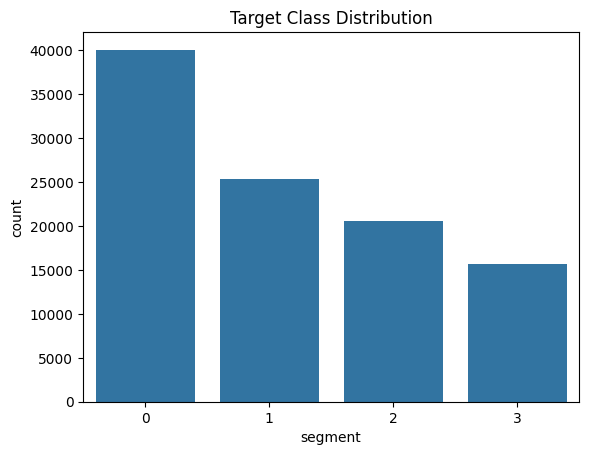

segment
0    40064
1    25397
2    20549
3    15648
Name: count, dtype: int64


In [ ]:
sns.countplot(x='segment', data=df)
plt.title("Target Class Distribution")
plt.show()

print(df.segment.value_counts())

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# List of continuous features from your dataset
continuous_features = [
    'play_frequency', 'avg_session_duration', 'total_playtime_hours',
    'login_streak', 'days_since_last_login', 'total_spending_thb',
    'avg_monthly_spending', 'spending_frequency', 'friend_count',
    'team_play_percentage', 'chat_activity_score', 'friend_invites_sent',
    'gifts_sent_received', 'ranked_participation_rate', 'tournament_entries',
    'competitive_rank', 'win_rate_ranked', 'watches_esports',
    'achievement_completion_rate', 'collection_progress', 'rare_items_count',
    'speed_of_progression', 'item_type_preference_cosmetic',
    'item_type_preference_performance', 'item_type_preference_social',
    'account_age_days', 'vip_tier', 'responds_to_discounts',
    'avg_match_length', 'peak_concurrent_hours', 'random_metric_1',
    'random_metric_2', 'random_metric_3'
]

# Function: ANOVA + eta-squared
def anova_and_eta(df, feature, target):
    groups = [df[df[target] == seg][feature].dropna()
              for seg in df[target].unique()]

    f_stat, p_value = stats.f_oneway(*groups)

    overall_mean = df[feature].mean()
    ss_between = sum([len(g) * (g.mean() - overall_mean)**2 for g in groups])
    ss_total = sum((df[feature] - overall_mean)**2)
    eta_sq = ss_between / ss_total if ss_total != 0 else np.nan

    return f_stat, p_value, eta_sq

results = []
for feature in continuous_features:
    try:
        f, p, eta = anova_and_eta(df, feature, target)
        results.append([feature, f, p, eta])
    except:
        pass

results_df = pd.DataFrame(results, columns=["feature", "anova_F", "p_value", "eta_squared"])
results_df.sort_values("p_value", inplace=True)

results_df

feature      anova_F        p_value  eta_squared
0                     play_frequency  1615.160026   0.000000e+00     0.045498
1               avg_session_duration  1909.427710   0.000000e+00     0.053345
2               total_playtime_hours  2406.555974   0.000000e+00     0.066312
3                       login_streak  1472.480691   0.000000e+00     0.041646
4              days_since_last_login  3862.906218   0.000000e+00     0.102335
5                 total_spending_thb  2588.165891   0.000000e+00     0.070961
6               avg_monthly_spending  4238.795617   0.000000e+00     0.111186
7                 spending_frequency  4246.463778   0.000000e+00     0.111365
8                       friend_count  2097.725041   0.000000e+00     0.058299
10               chat_activity_score  1461.869356   0.000000e+00     0.041358
11               friend_invites_sent  1835.082254   0.000000e+00     0.051374
12               gifts_sent_received  1913.165293   0.000000e+00     0.053444
14                tournament_entries  1516.093522   0.000000e+00     0.042827
21              speed_of_progression  1548.475579   0.000000e+00     0.043701
20                  rare_items_count  3199.214976   0.000000e+00     0.086270
16                   win_rate_ranked  1193.741735   0.000000e+00     0.034031
29             peak_concurrent_hours  1643.701685   0.000000e+00     0.046264
26                          vip_tier  5919.591807   0.000000e+00     0.148718
22     item_type_preference_cosmetic   456.023748  2.375636e-294     0.013279
9               team_play_percentage   310.889102  6.061676e-201     0.009092
18       achievement_completion_rate   298.072158  1.118627e-192     0.008720
19               collection_progress   270.714289  5.031830e-175     0.007926
23  item_type_preference_performance   270.559177  6.336488e-175     0.007921
17                   watches_esports   173.512054  3.275806e-112     0.005095
15                  competitive_rank   167.257124  3.645460e-108     0.004912
13         ranked_participation_rate    24.731772   5.461108e-16     0.000729
32                   random_metric_3     1.664184   1.723506e-01     0.000049
28                  avg_match_length     1.569646   1.944007e-01     0.000046
31                   random_metric_2     0.810113   4.880151e-01     0.000024
25                  account_age_days     0.702001   5.507017e-01     0.000021
24       item_type_preference_social     0.551083   6.473782e-01     0.000016
30                   random_metric_1     0.443670   7.217833e-01     0.000013
27             responds_to_discounts     0.230291   8.753481e-01     0.000007

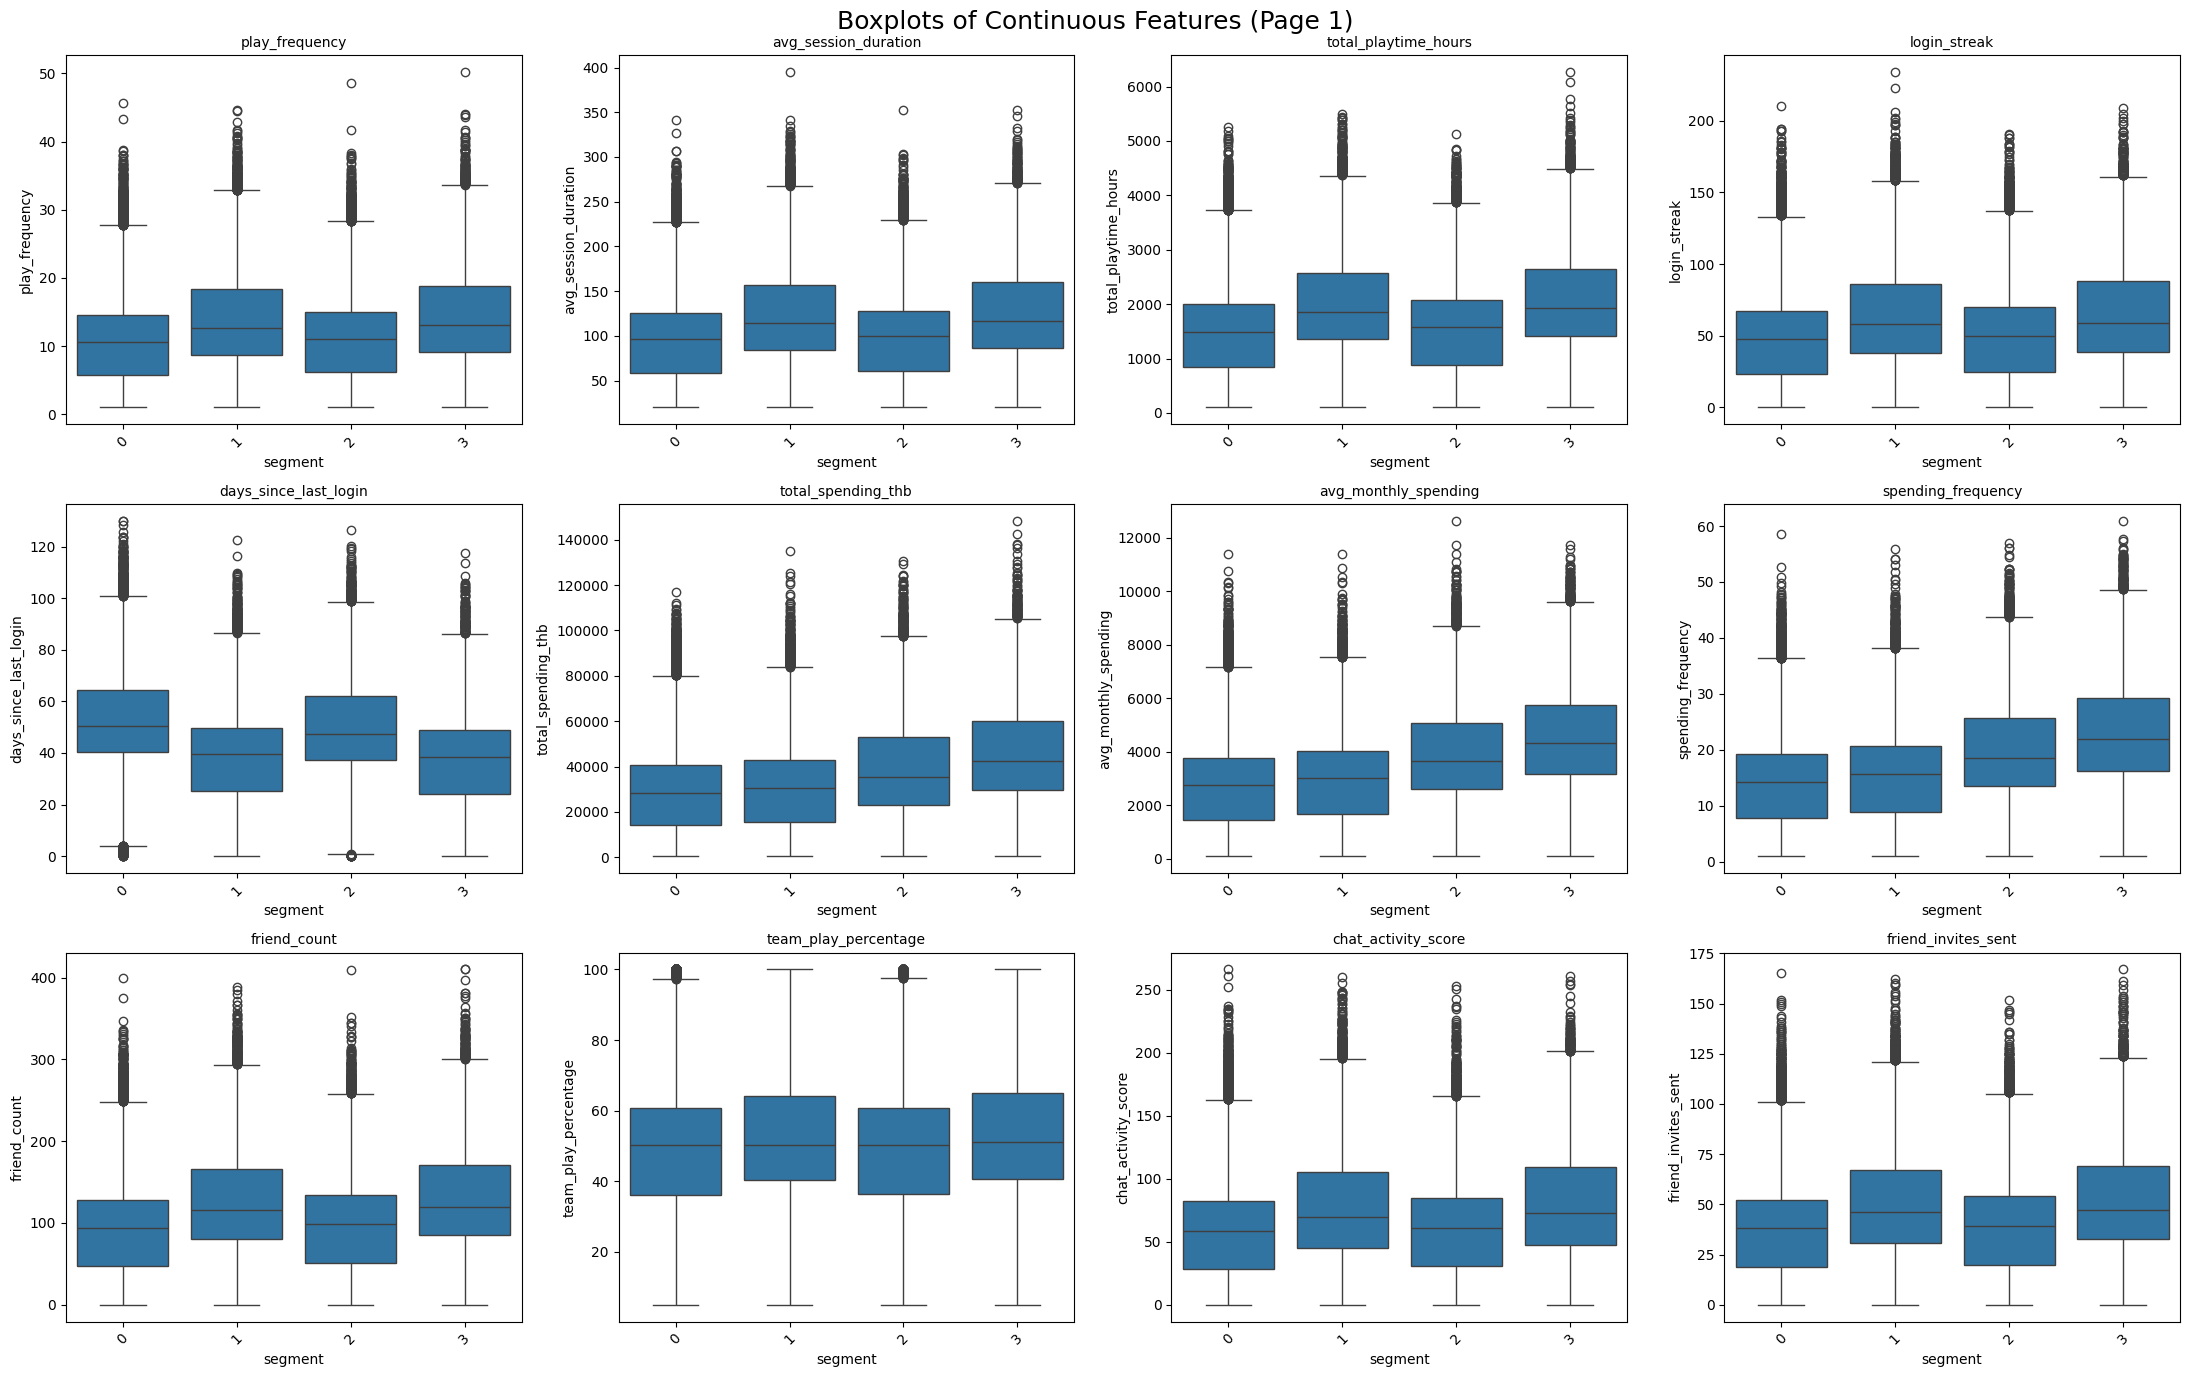

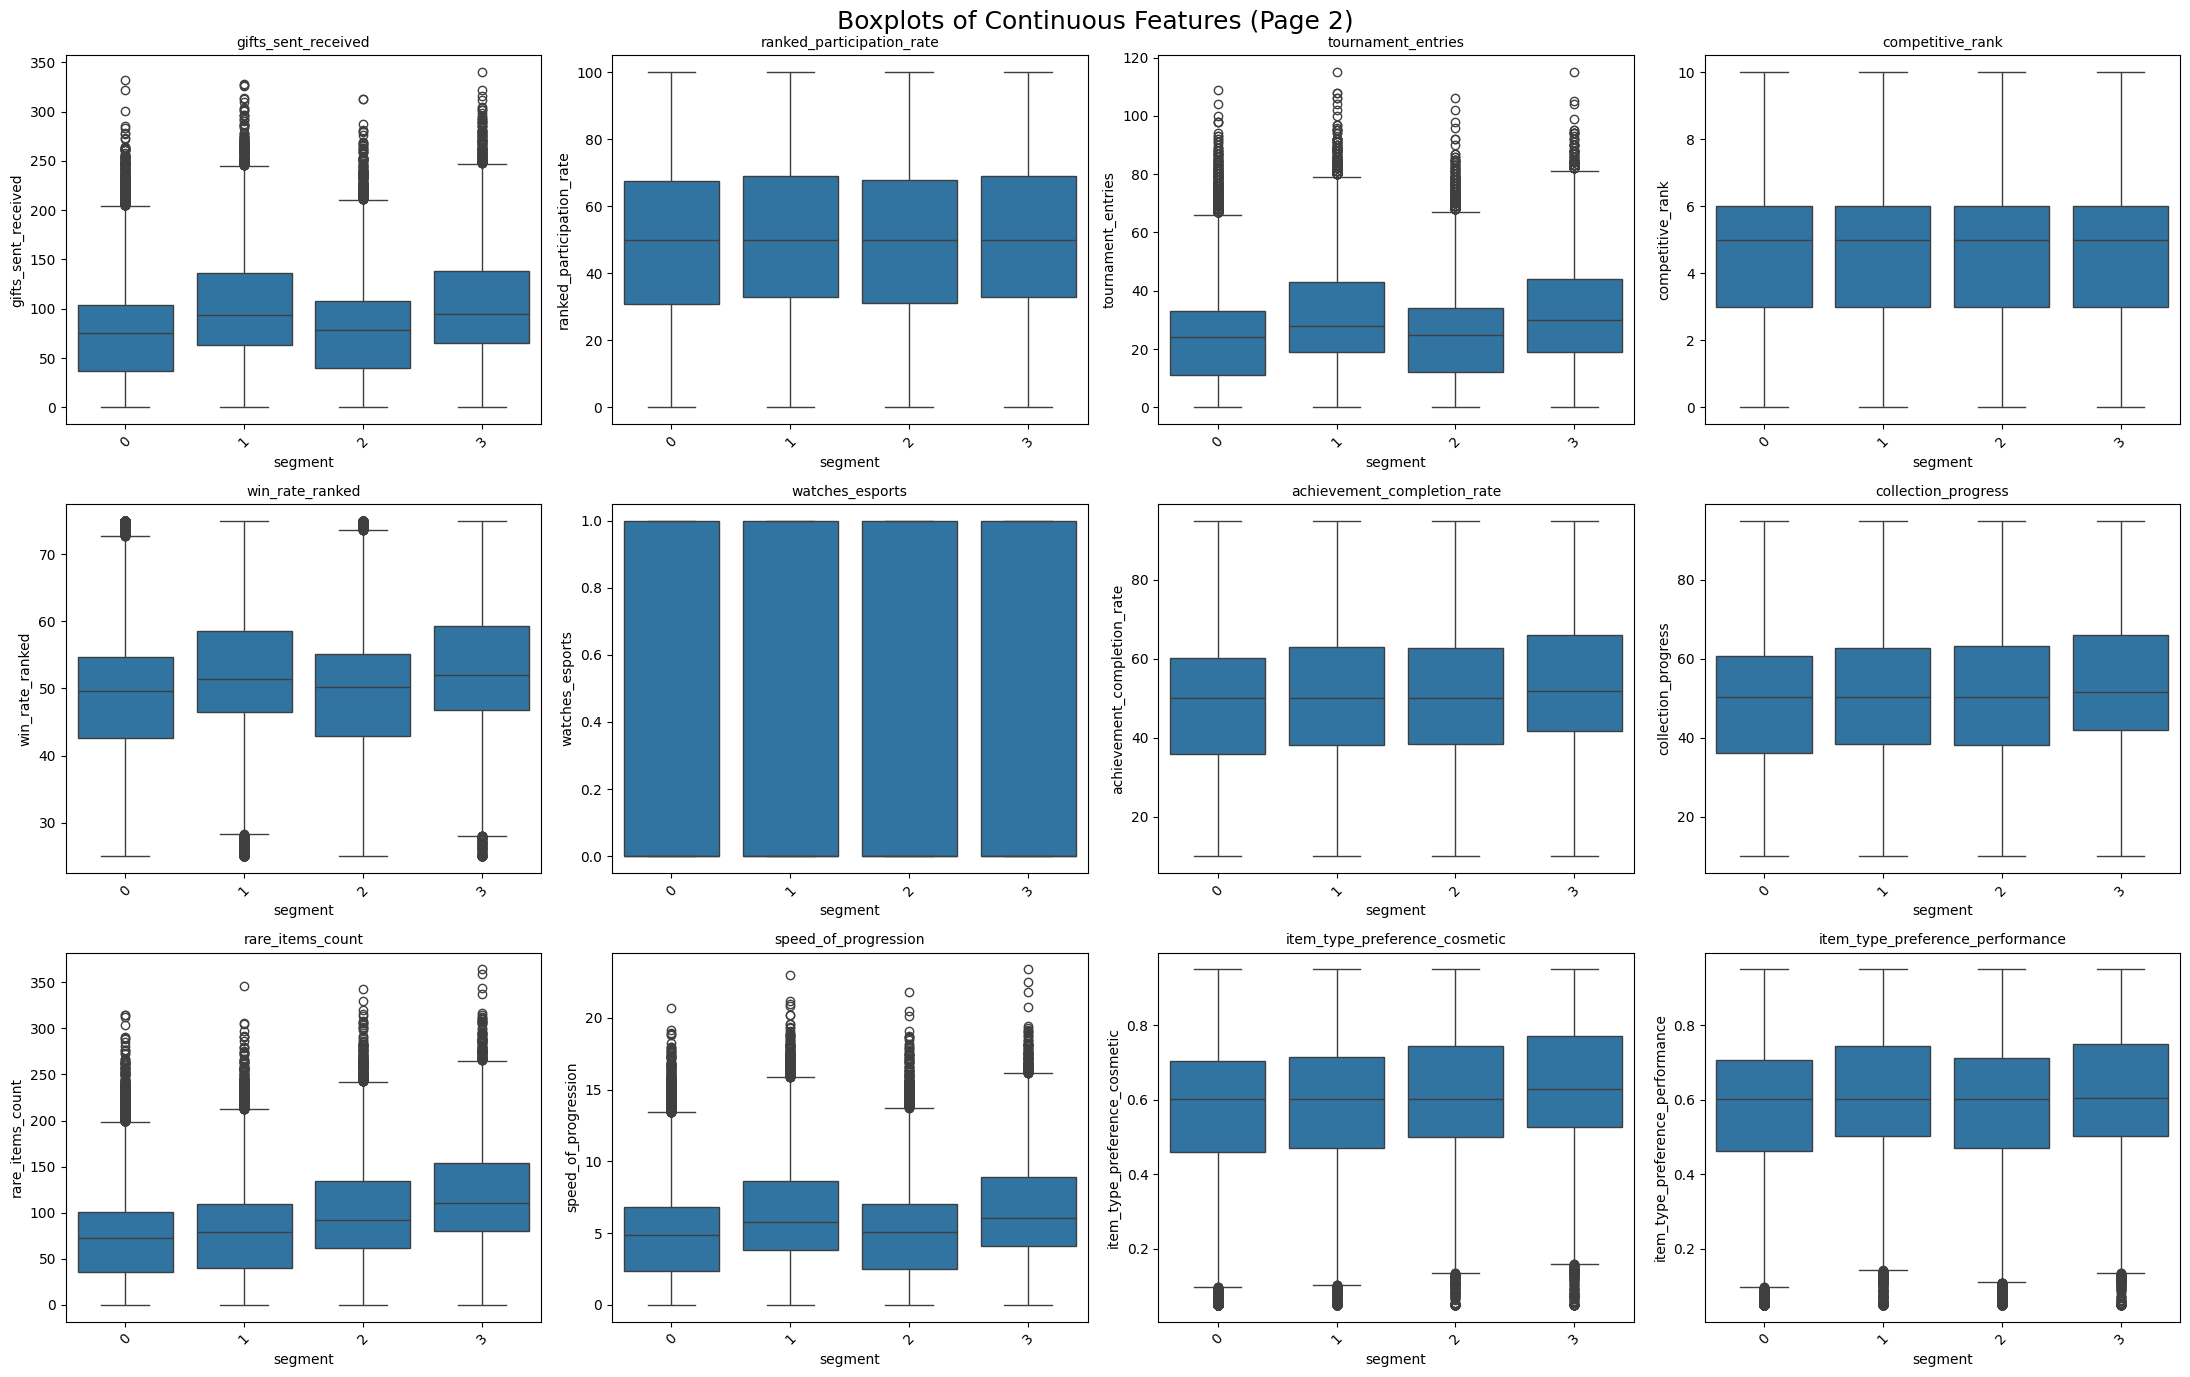

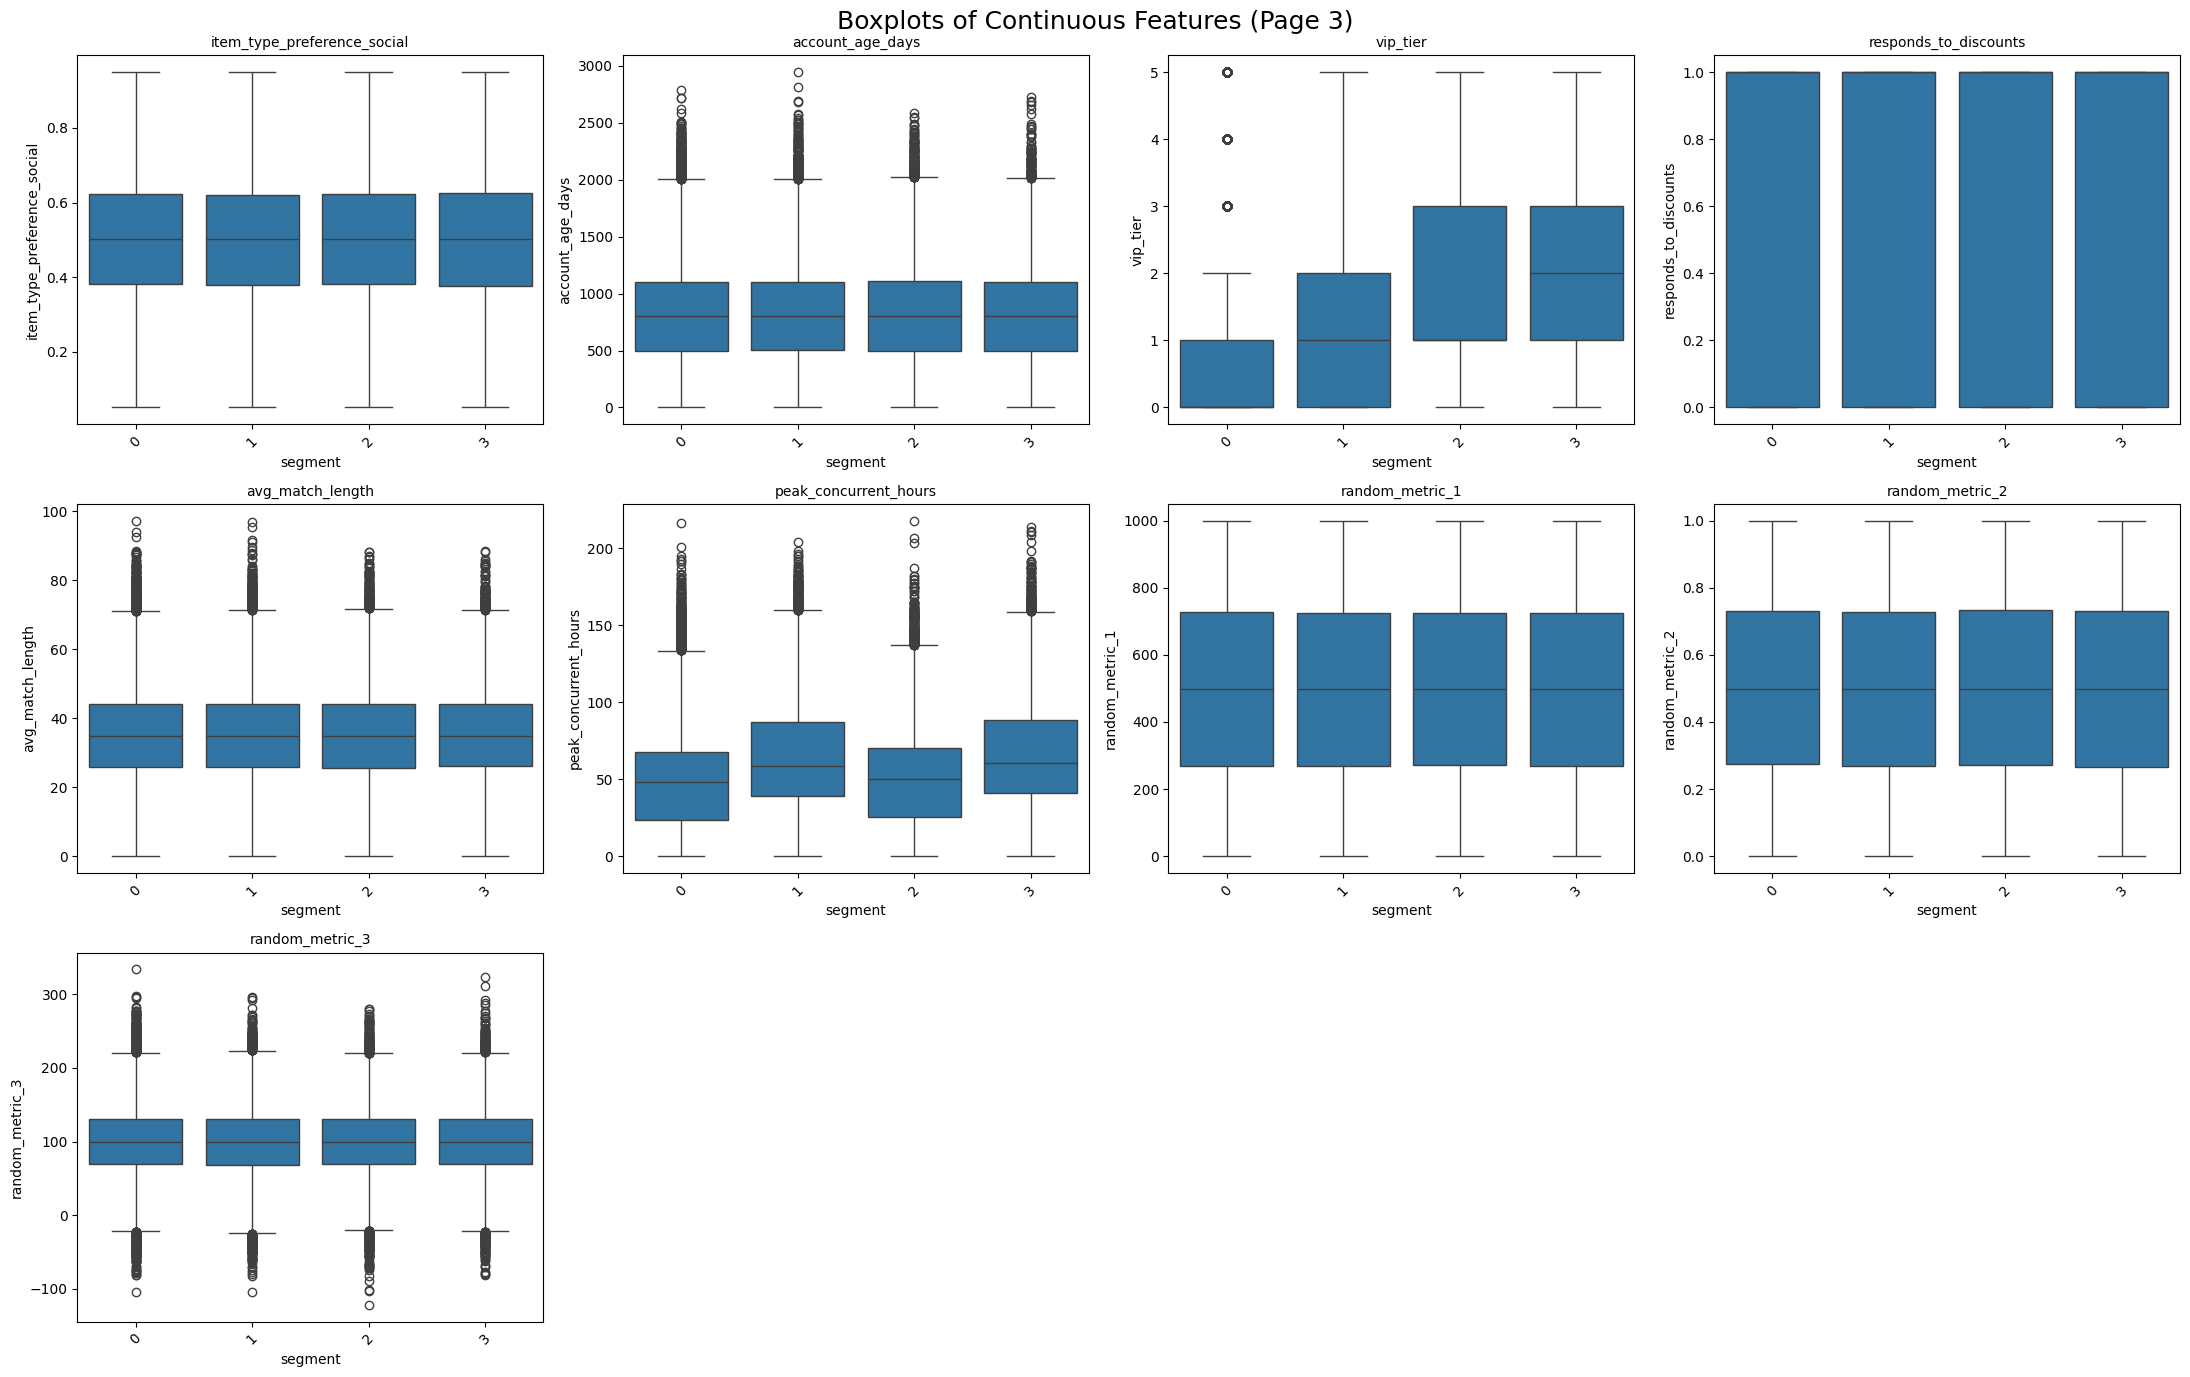

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

rows = 3
cols = 4
plots_per_page = rows * cols
num_pages = math.ceil(len(continuous_features) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, len(continuous_features))
    subset = continuous_features[start:end]

    fig, axes = plt.subplots(rows, cols, figsize=(22, 14))
    axes = axes.flatten()

    for i, feature in enumerate(subset):
        sns.boxplot(data=df, x=target, y=feature, ax=axes[i])
        axes[i].set_title(f"{feature}", fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(len(subset), len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"Boxplots of Continuous Features (Page {page+1})", fontsize=18)
    plt.tight_layout()
    plt.show()

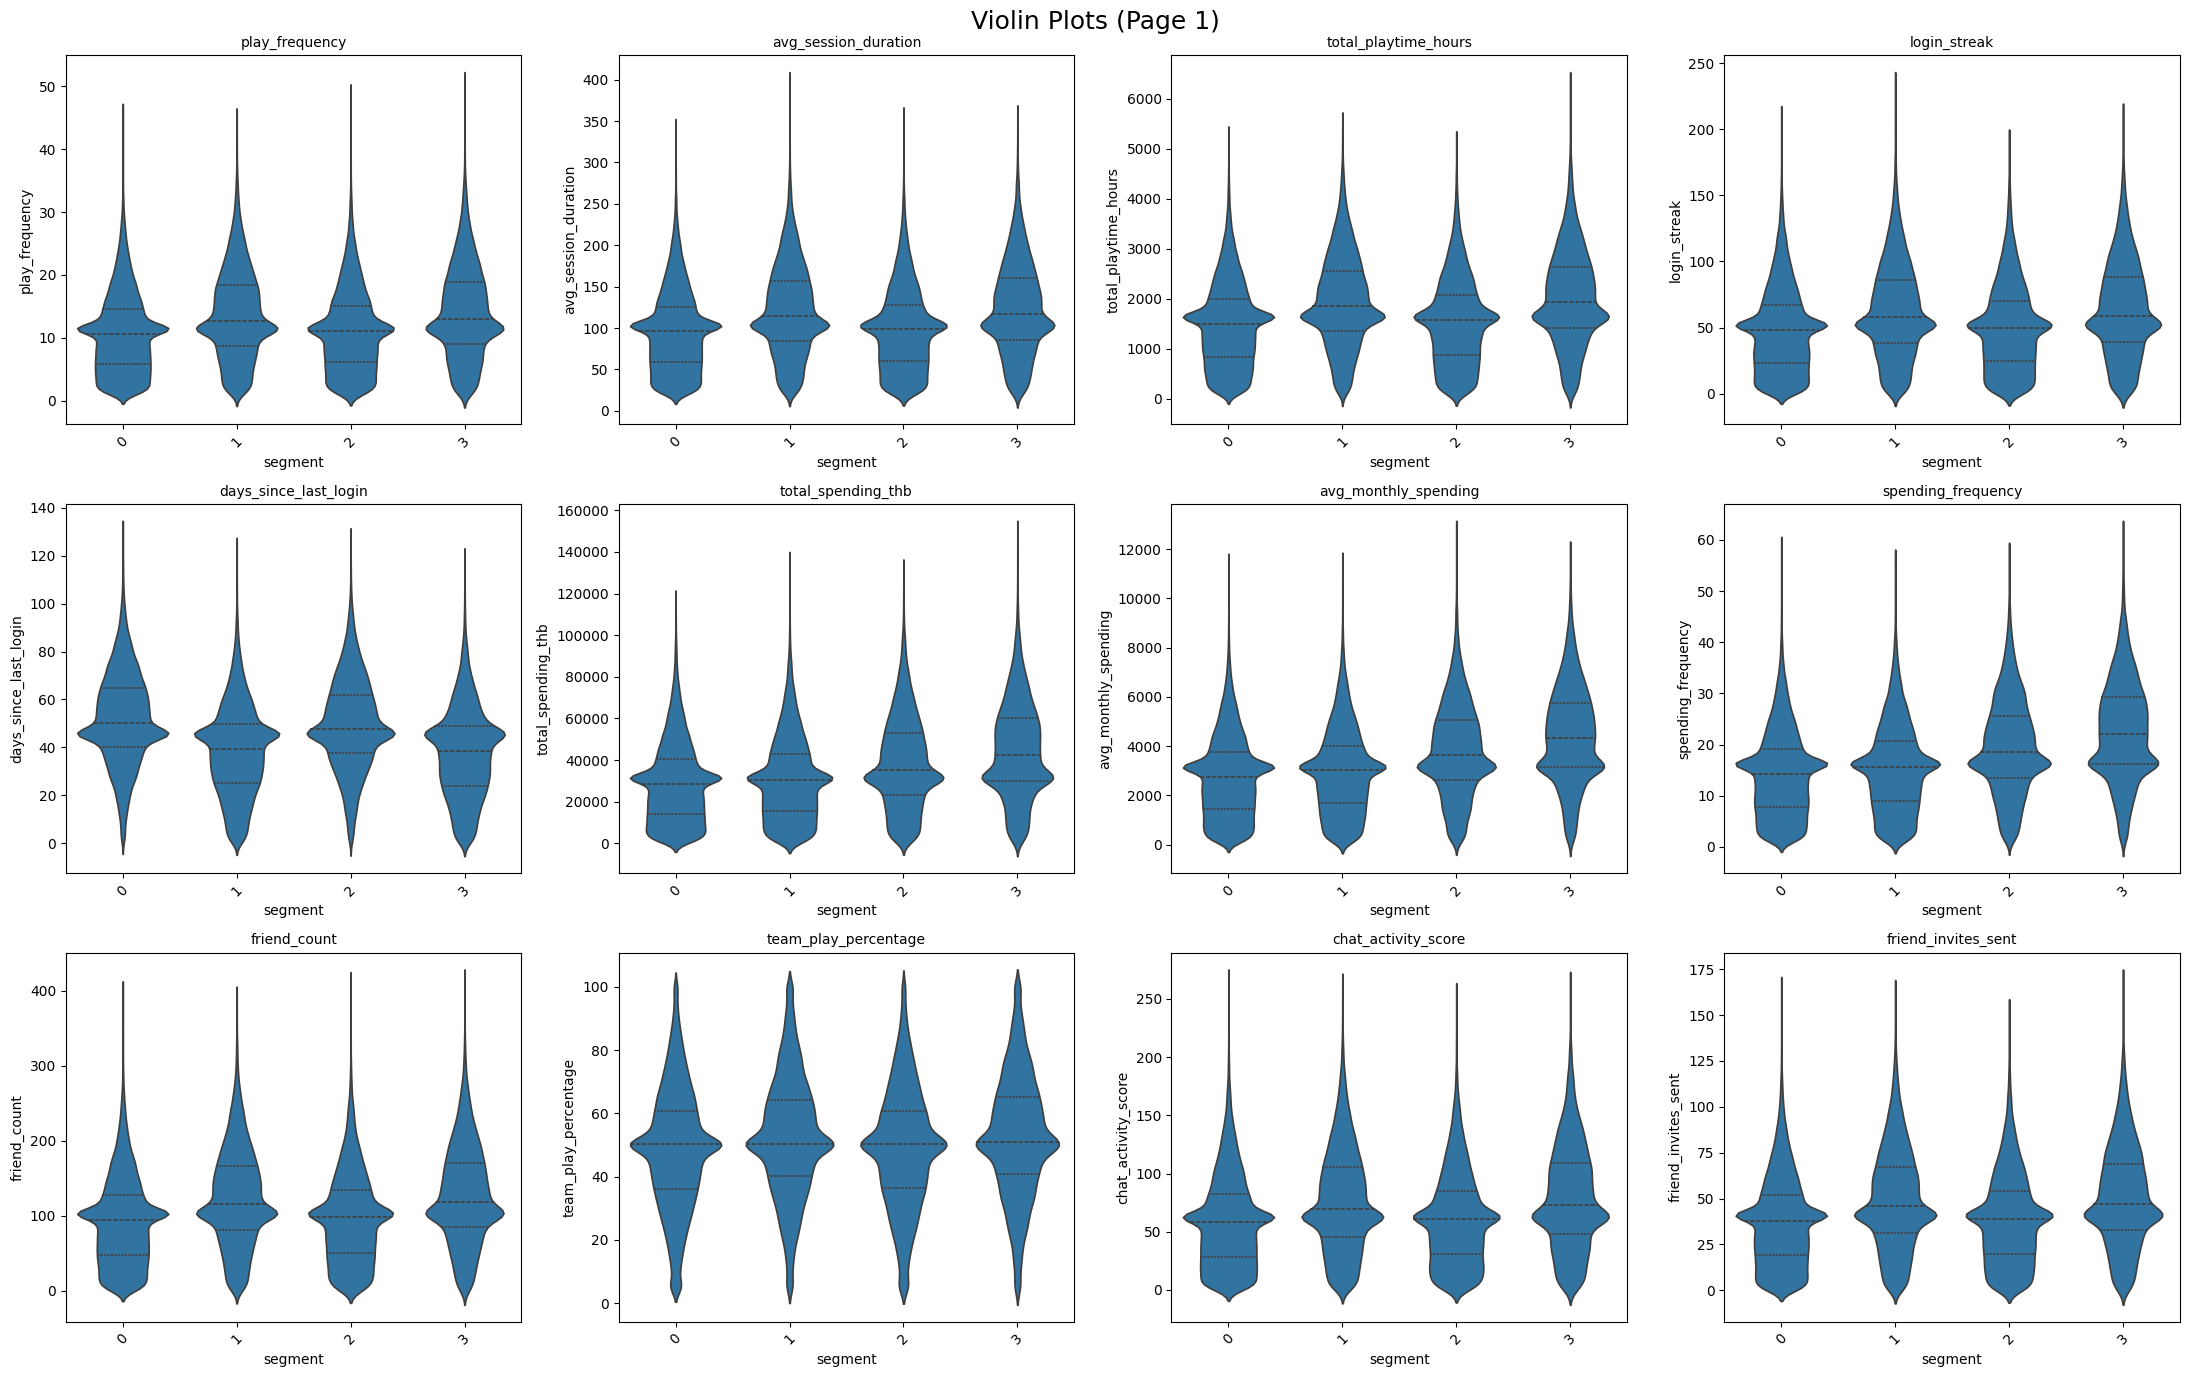

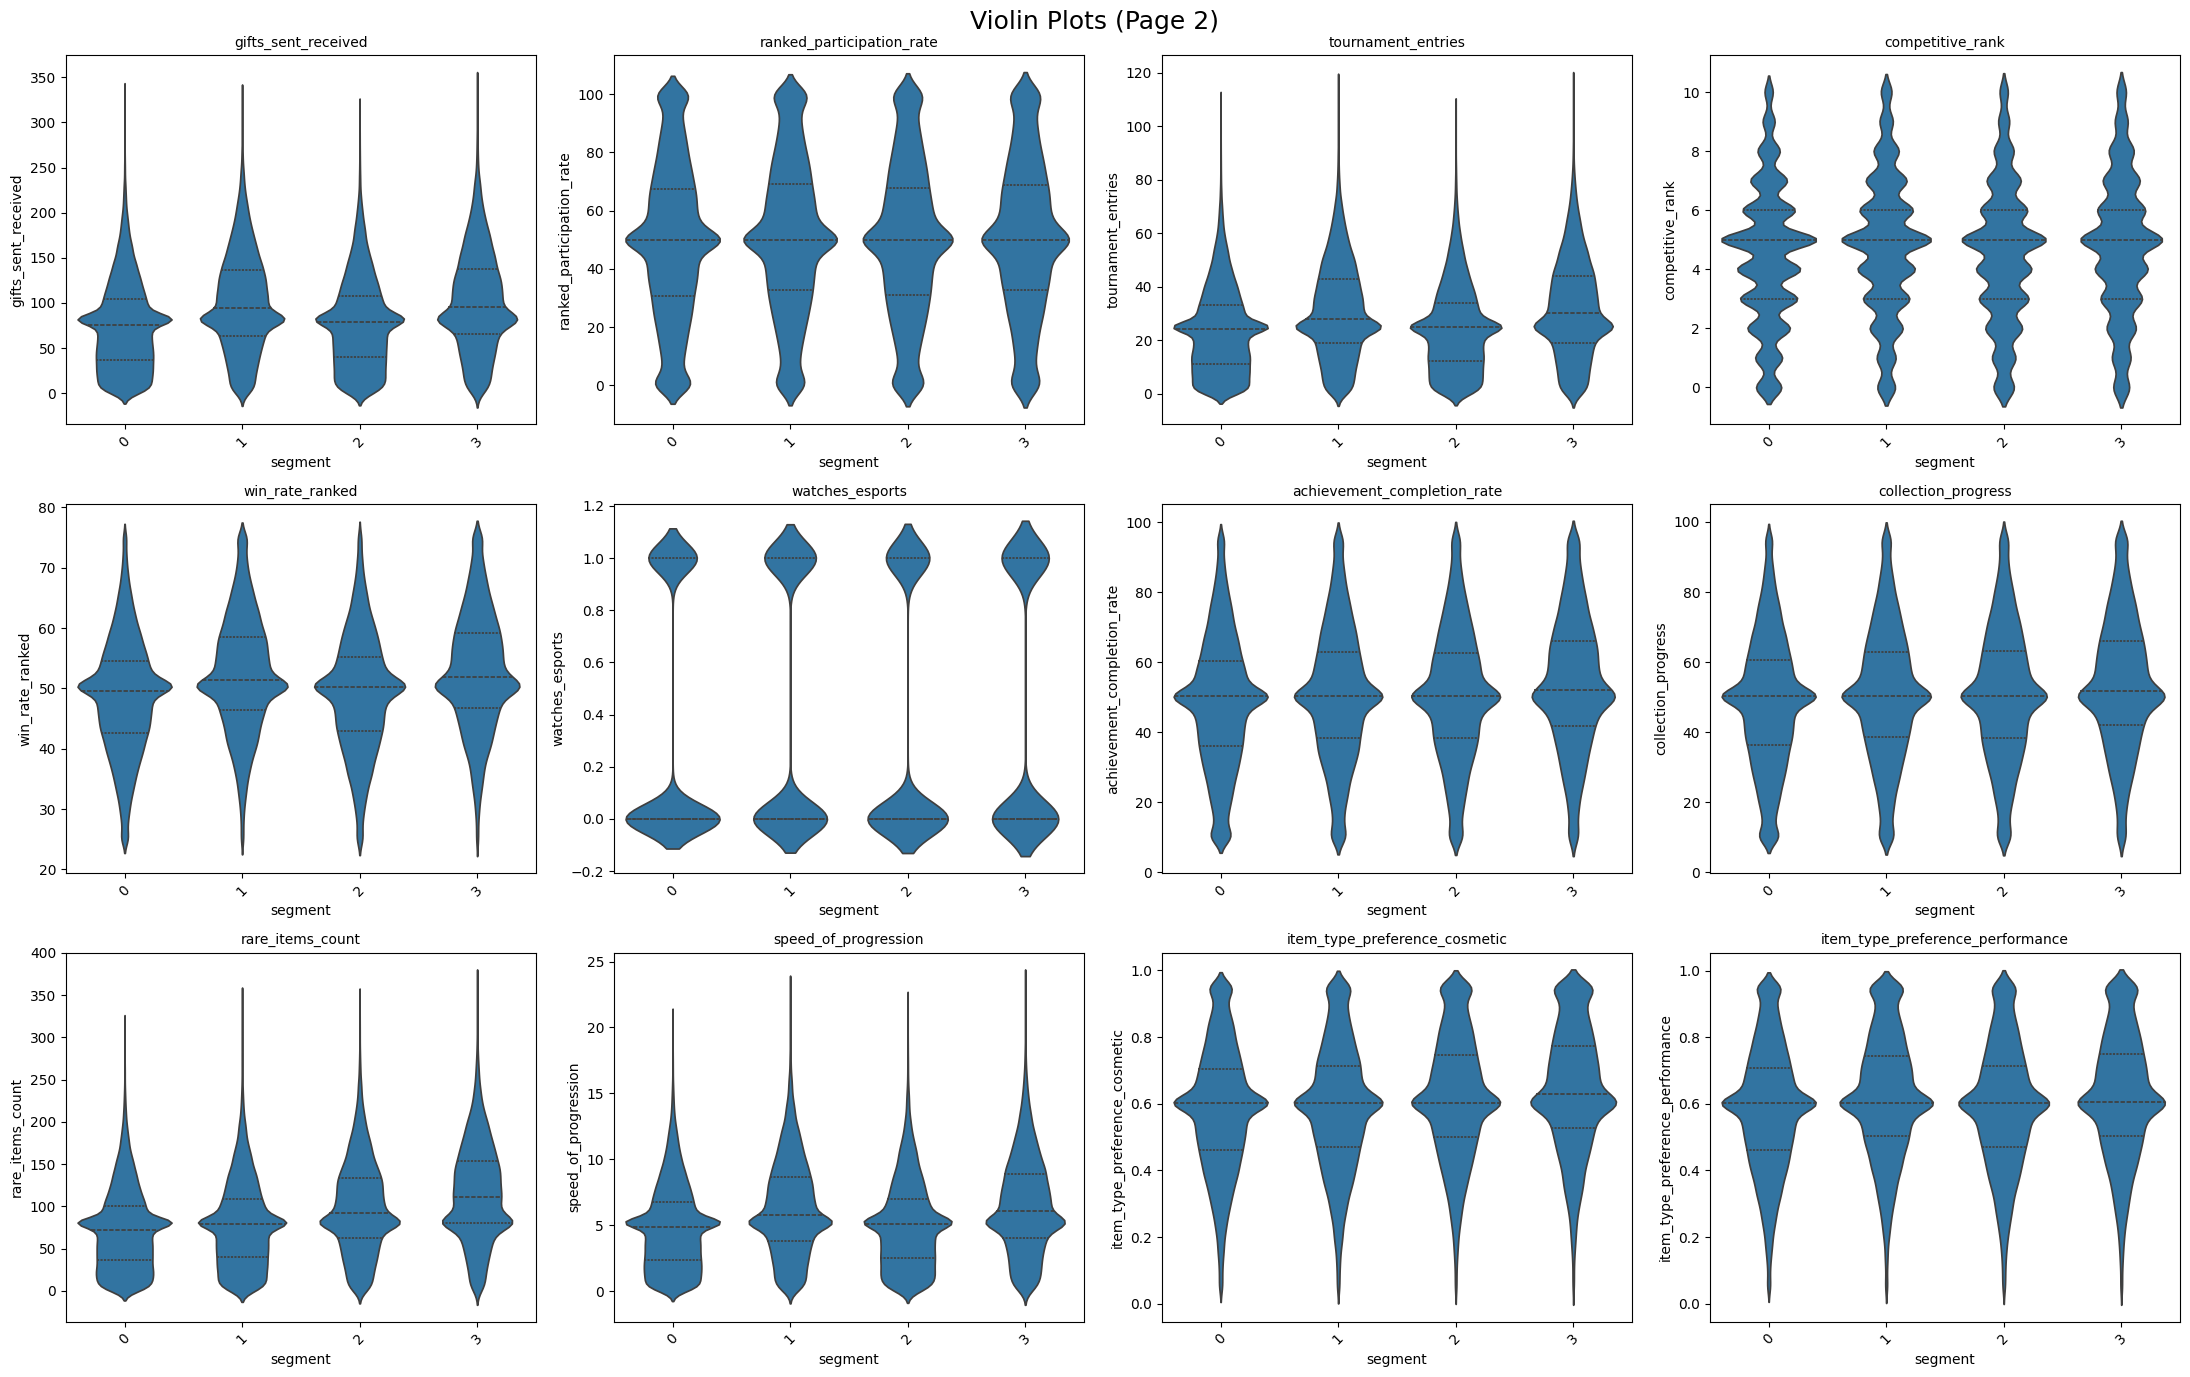

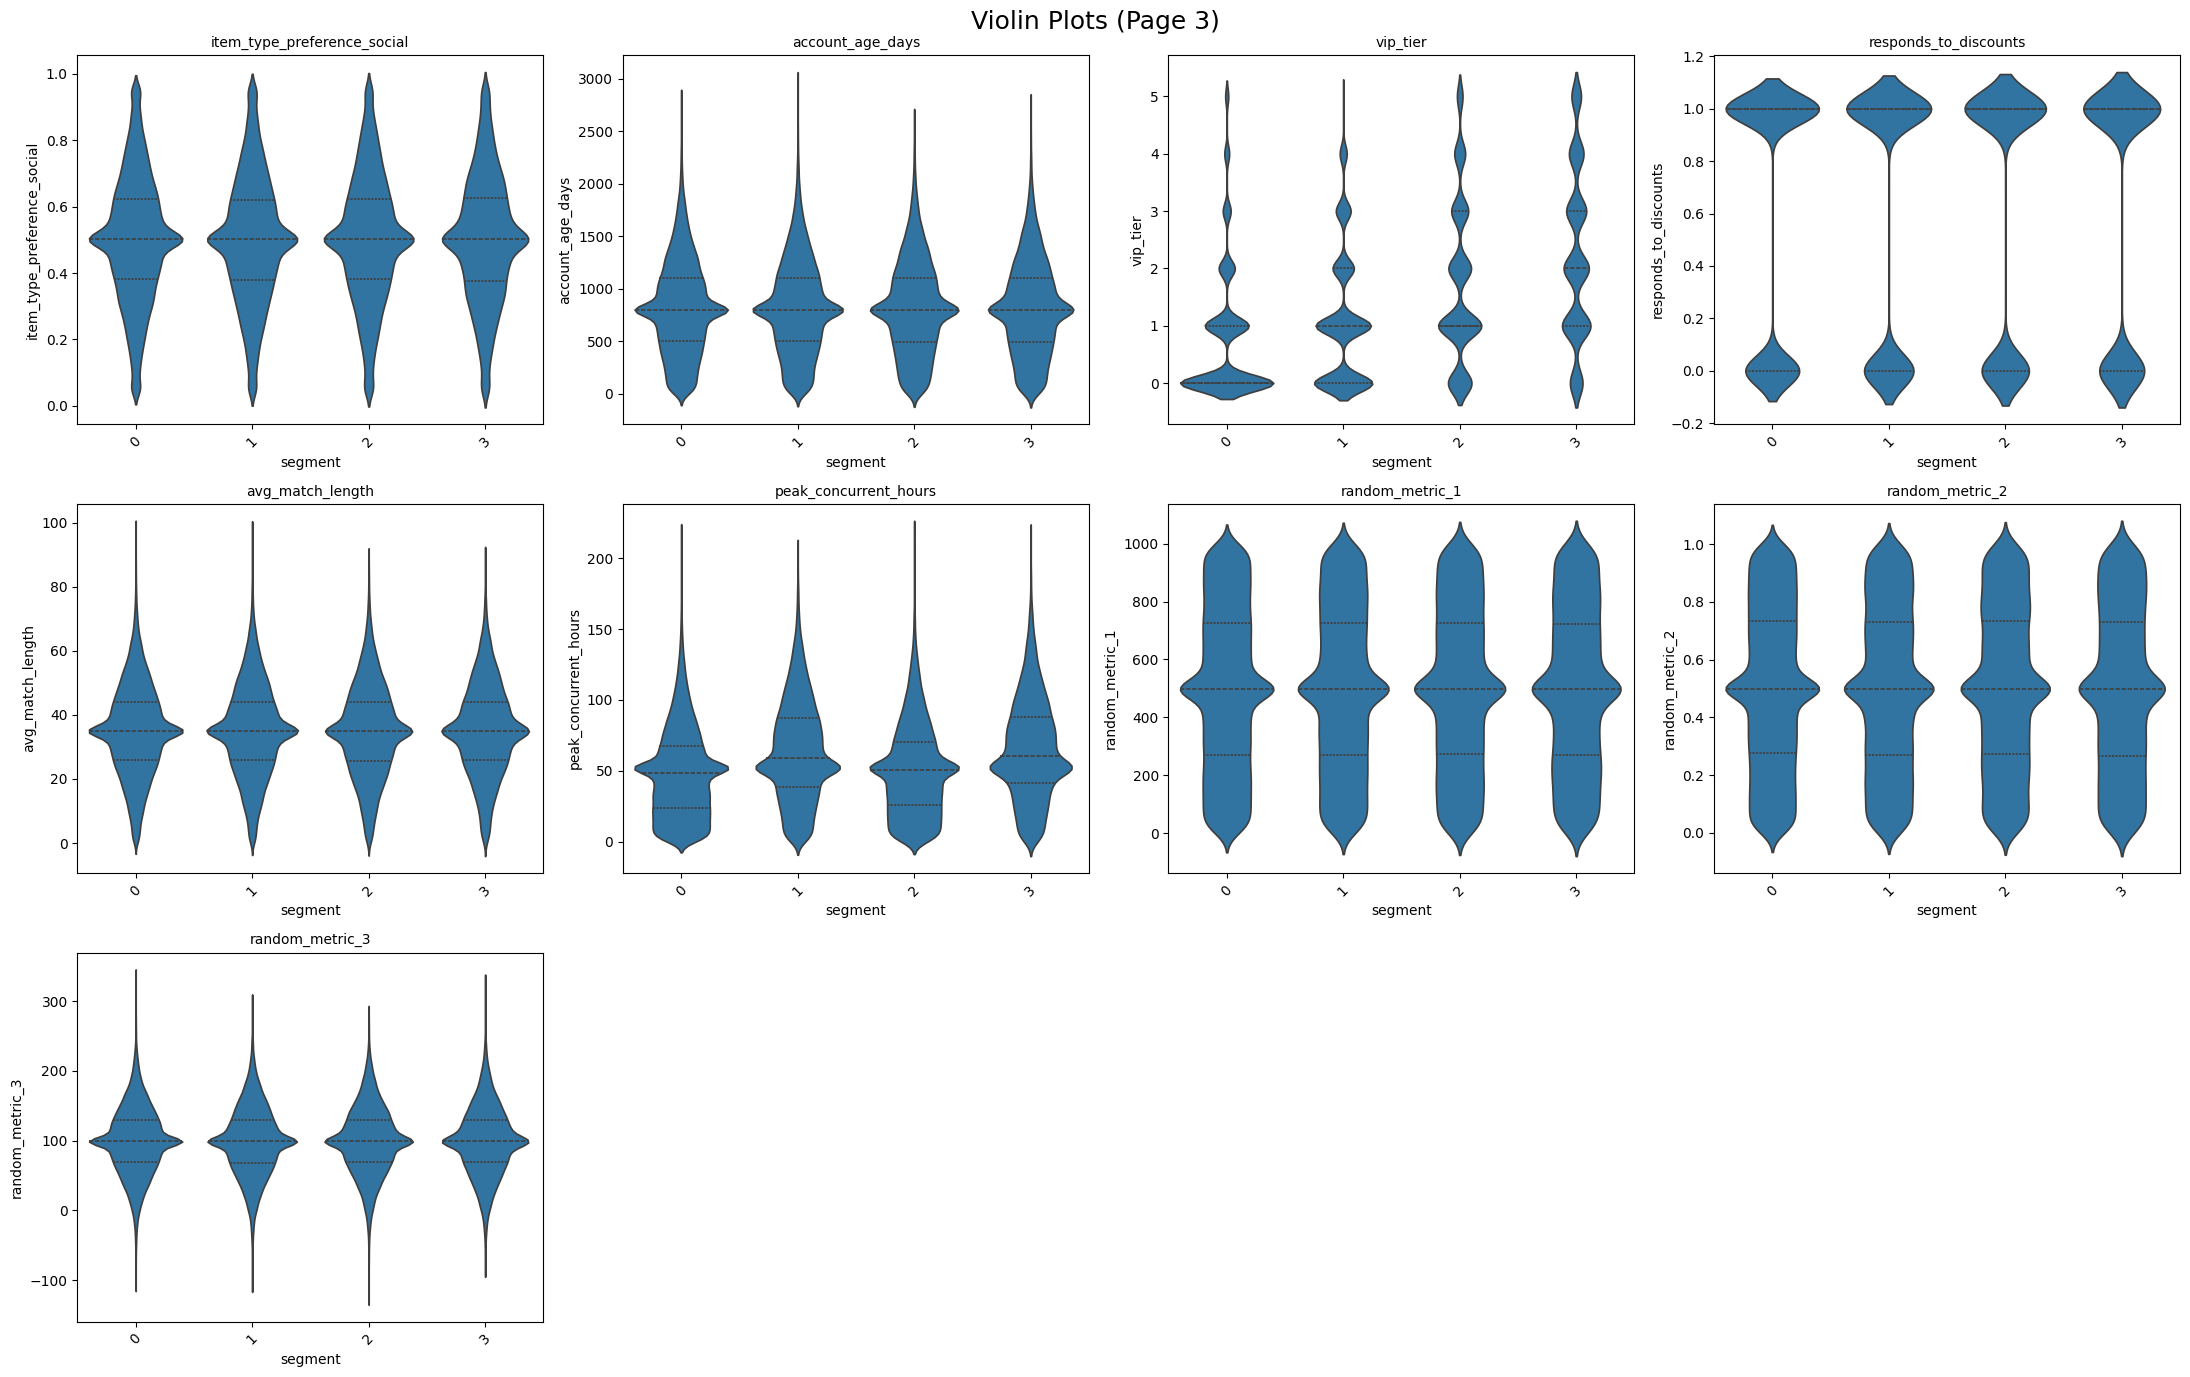

In [ ]:
rows = 3
cols = 4
plots_per_page = rows * cols
num_pages = math.ceil(len(continuous_features) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, len(continuous_features))
    subset = continuous_features[start:end]

    fig, axes = plt.subplots(rows, cols, figsize=(22, 14))
    axes = axes.flatten()

    for i, feature in enumerate(subset):
        sns.violinplot(data=df, x=target, y=feature, ax=axes[i], inner="quartile")
        axes[i].set_title(feature, fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(len(subset), len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"Violin Plots (Page {page+1})", fontsize=18)
    plt.tight_layout()
    plt.show()


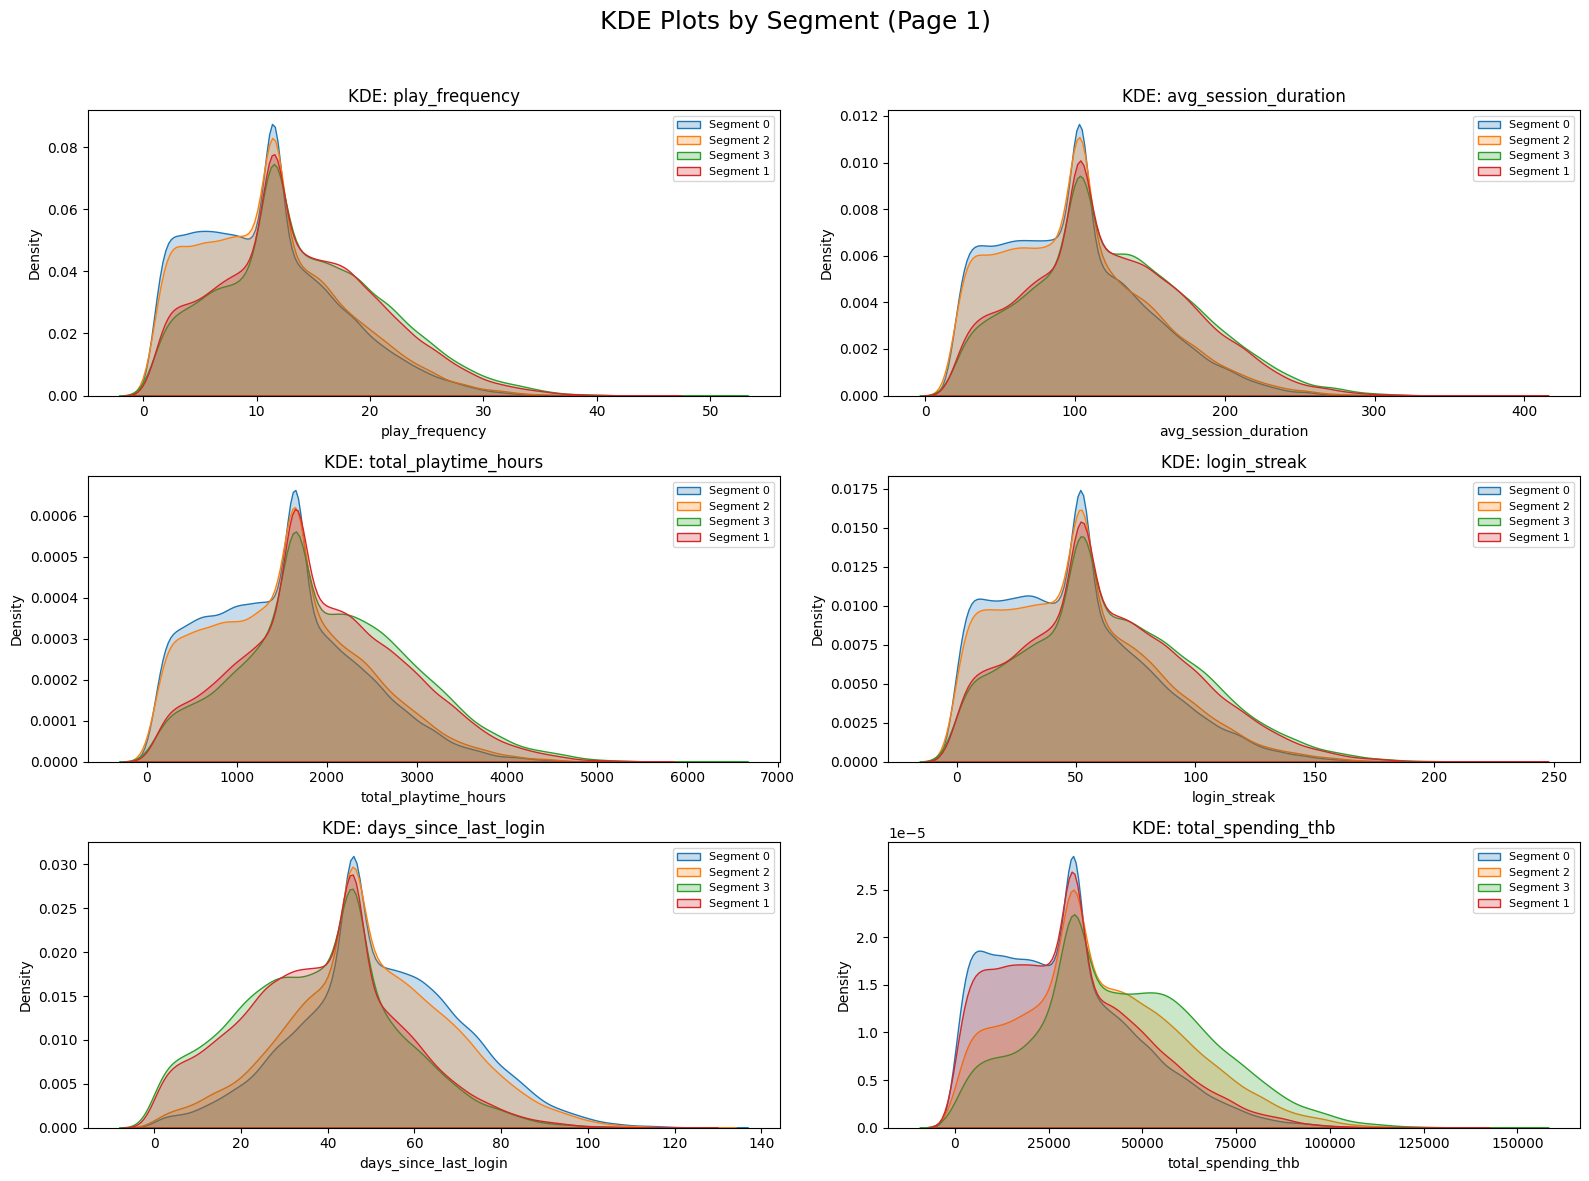

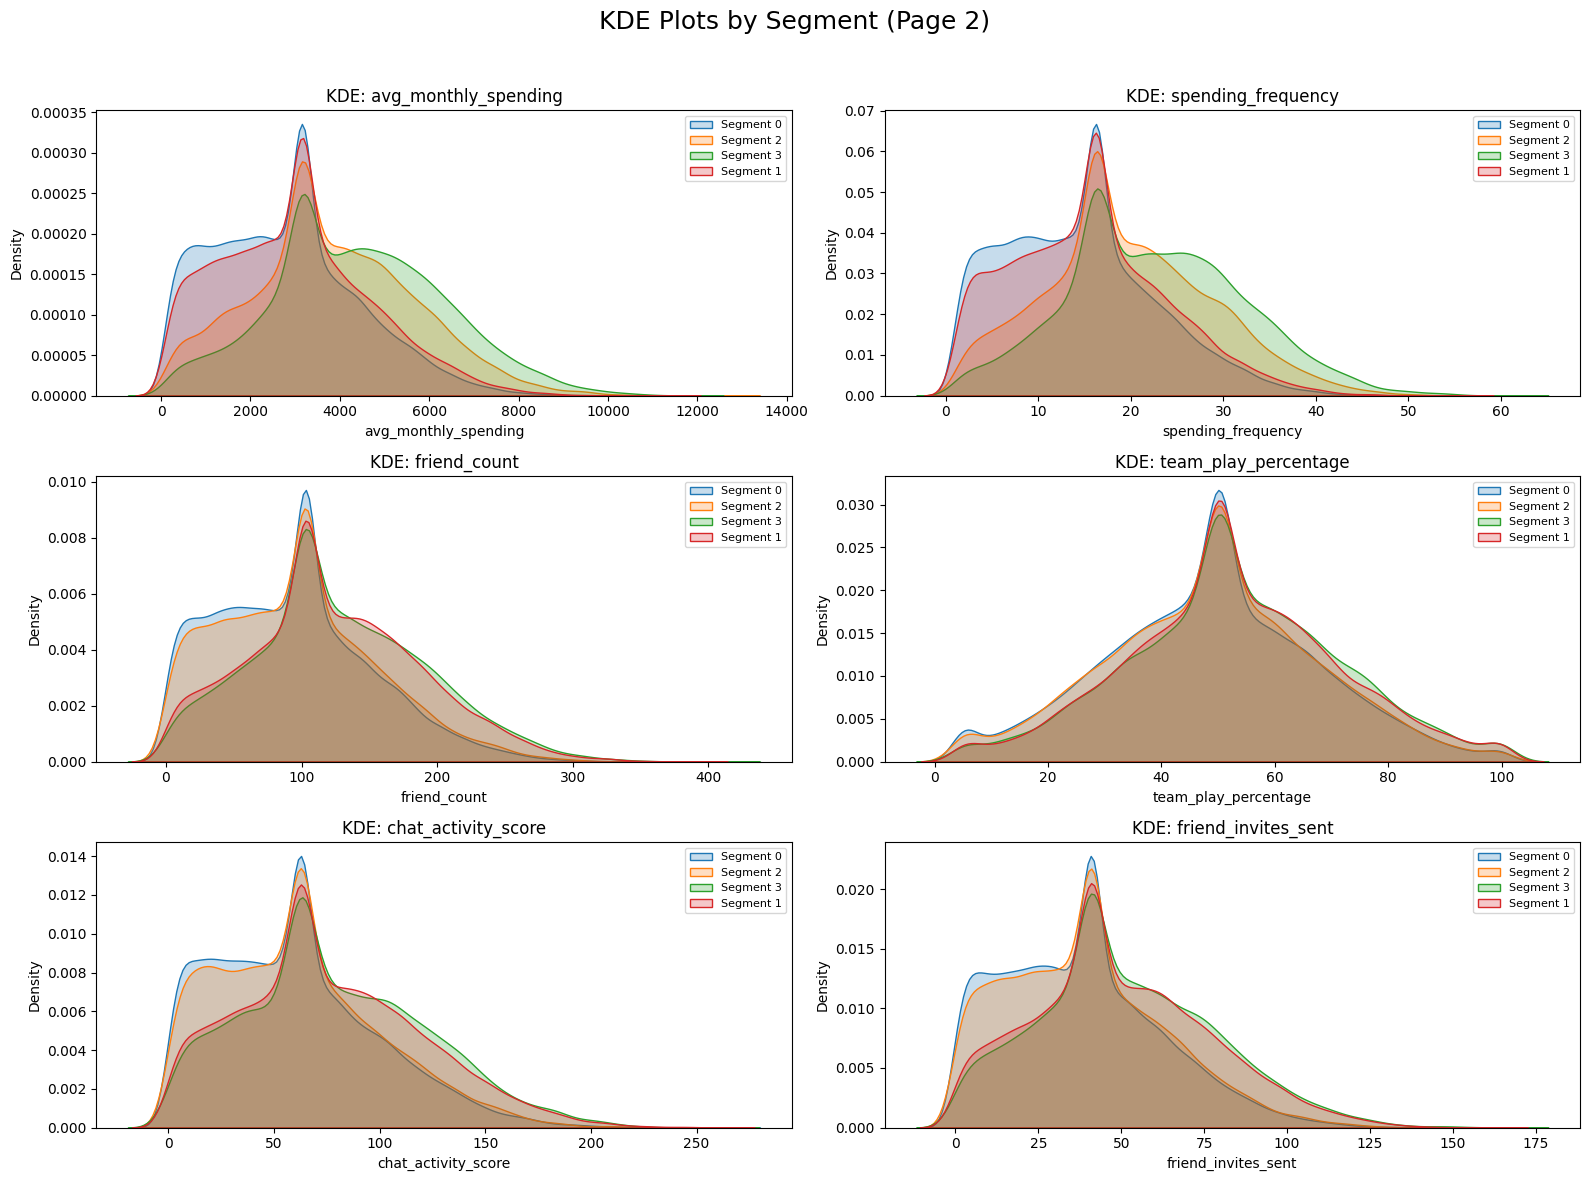

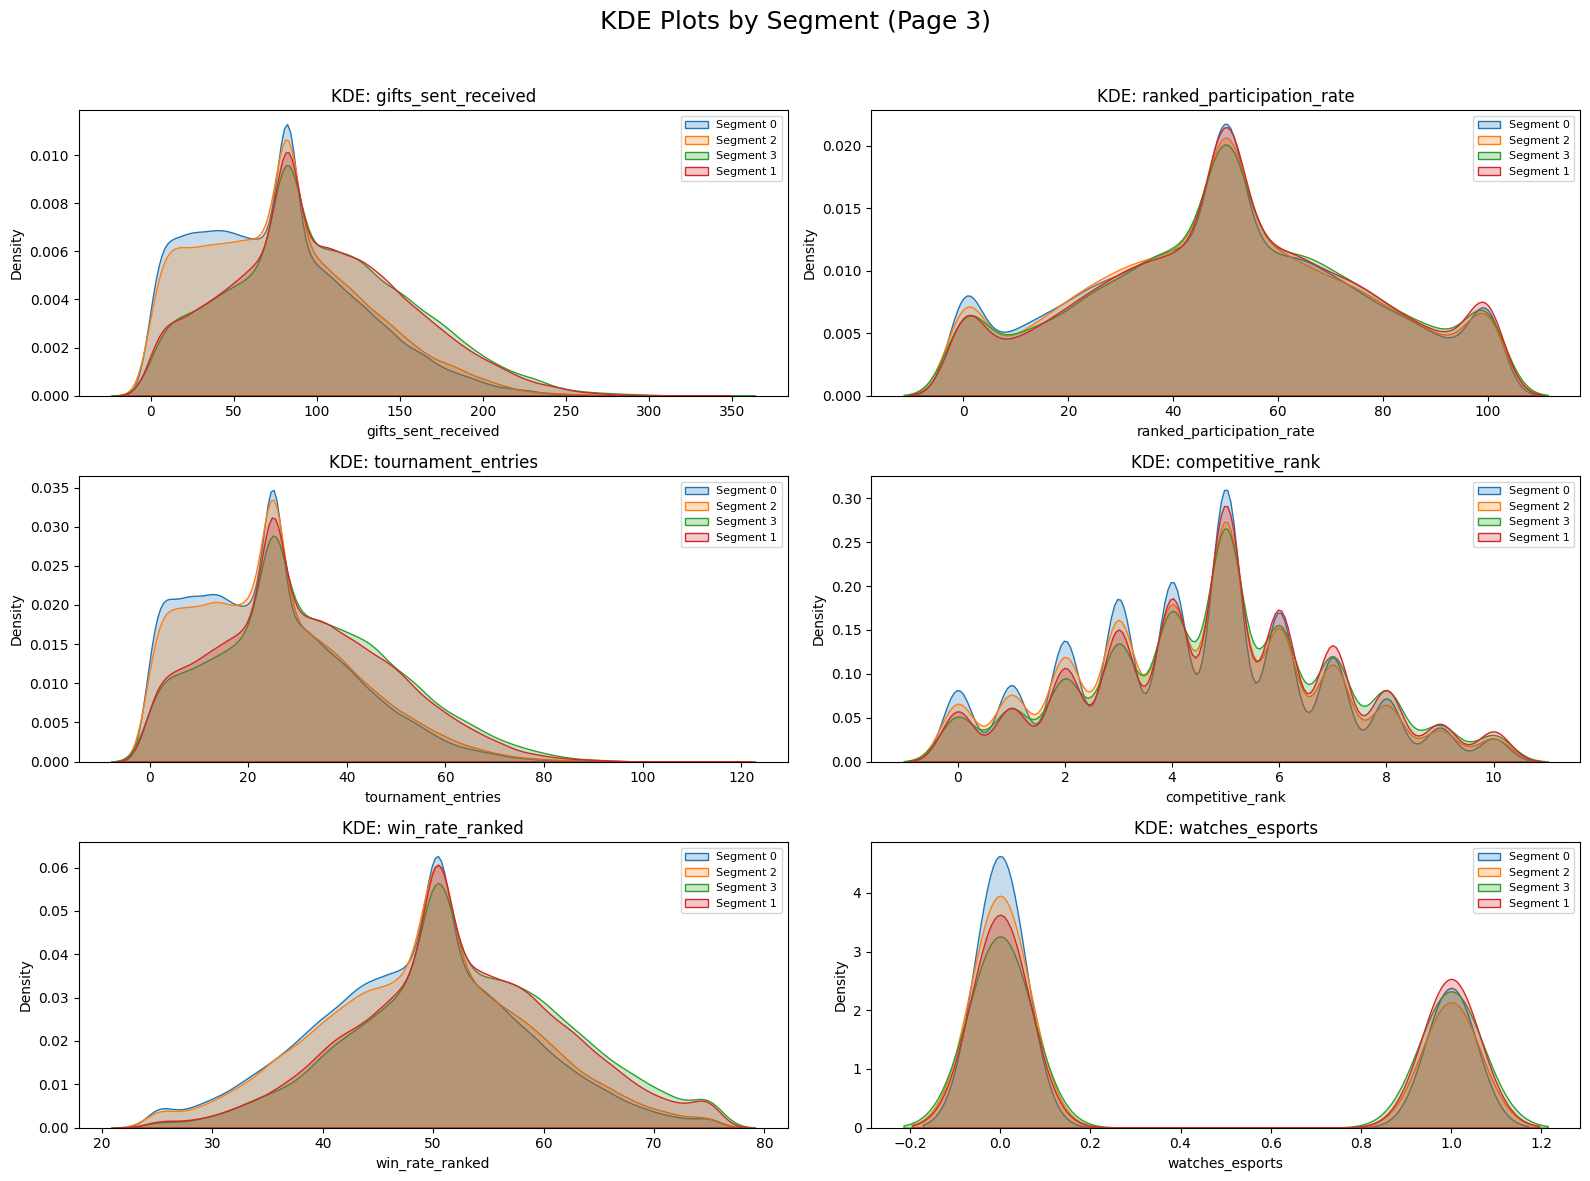

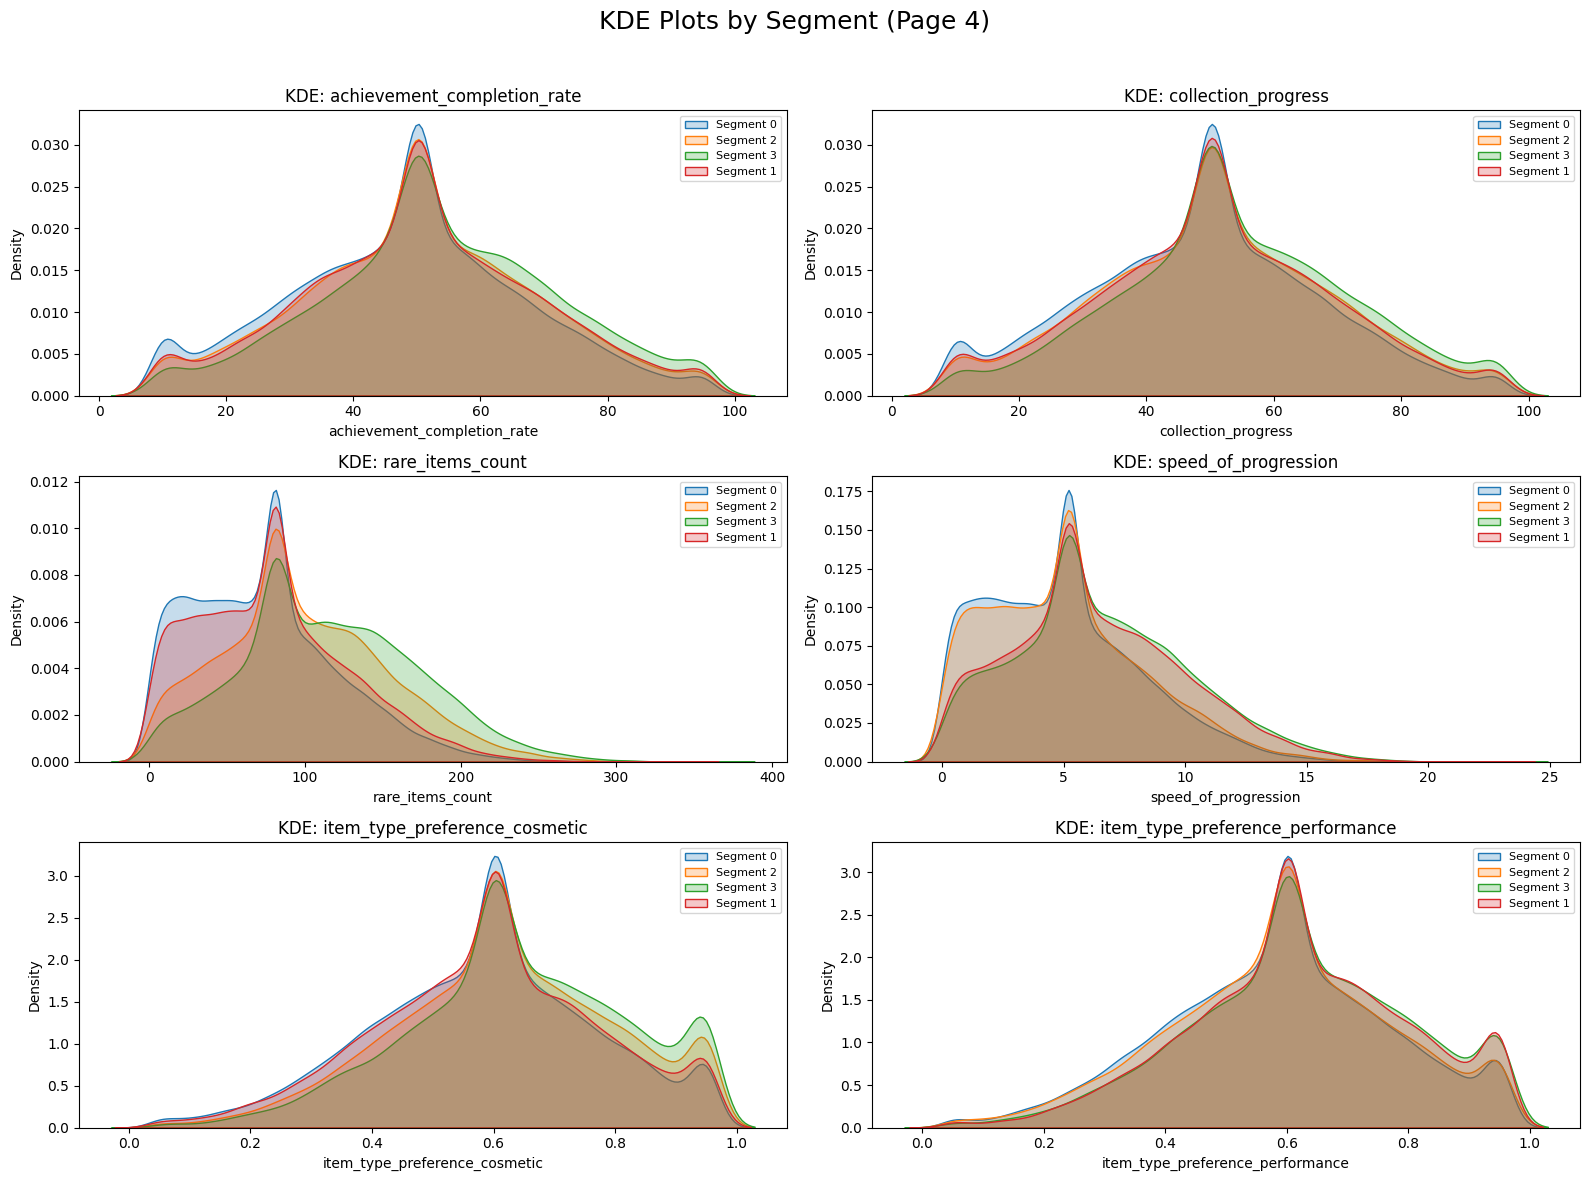

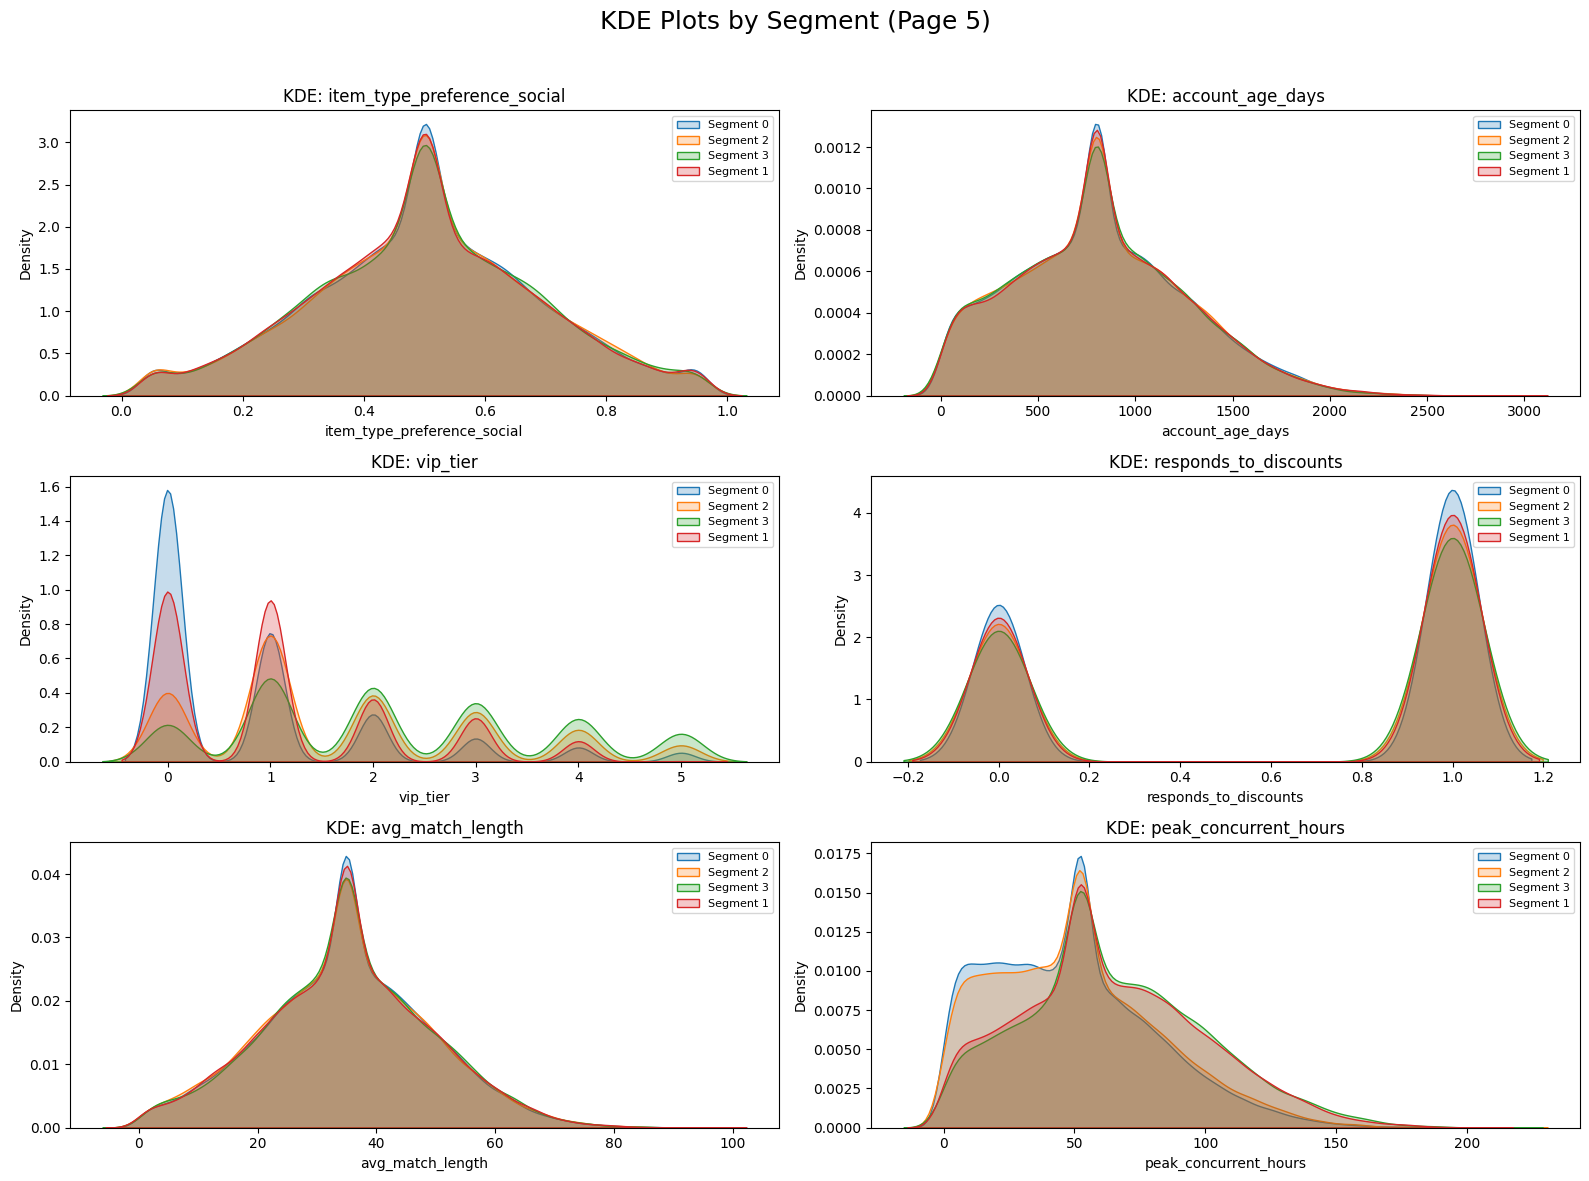

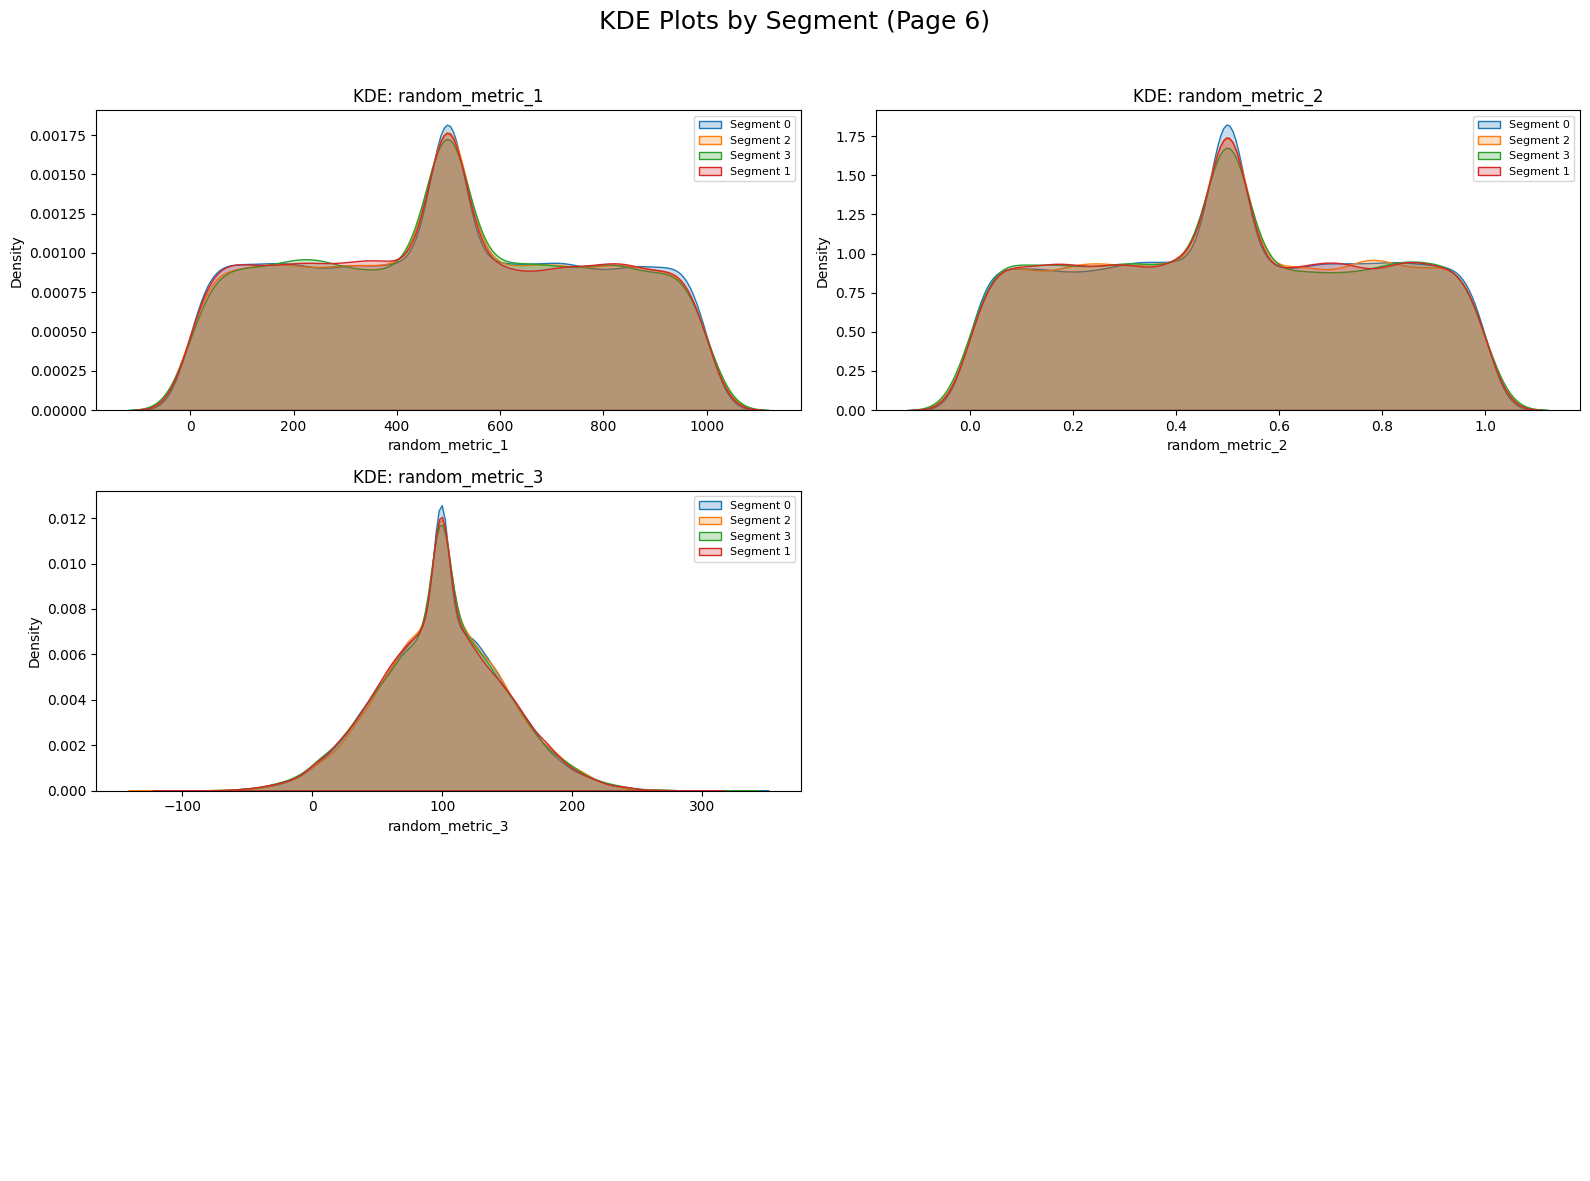

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

rows = 3
cols = 2  # smaller because KDE plots can be dense
plots_per_page = rows * cols
num_pages = math.ceil(len(continuous_features) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, len(continuous_features))
    subset = continuous_features[start:end]

    fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
    axes = axes.flatten()

    for i, feature in enumerate(subset):
        ax = axes[i]
        for seg in df[target].dropna().unique():  # skip null segments if any
            data = df[df[target] == seg][feature].dropna()
            if len(data) > 0:
                sns.kdeplot(data, label=f"Segment {seg}", fill=True, ax=ax)
        ax.set_title(f"KDE: {feature}")
        ax.legend(fontsize=8)

    # Turn off unused subplots
    for j in range(len(subset), len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"KDE Plots by Segment (Page {page+1})", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [ ]:
summary_stats = df.groupby(target)[continuous_features].agg(
    ["mean", "median", "std", "min", "max", "count"]
)

summary_stats.T


segment                            0             1             2             3
play_frequency  mean       10.795883     13.739087     11.147464     14.074736
                median     10.661878     12.715852     11.084123     13.021419
                std         6.314125      7.071094      6.413915      7.238165
                min         1.000033      1.001000      1.000123      1.005050
                max        45.714271     44.649866     48.571305     50.186794
...                              ...           ...           ...           ...
random_metric_3 median     99.000000     99.000000     99.000000     99.000000
                std        47.716747     48.243395     47.792794     48.583047
                min      -104.000000   -104.000000   -122.000000    -81.000000
                max       334.000000    297.000000    280.000000    324.000000
                count   40064.000000  25397.000000  20549.000000  15648.000000

[198 rows x 4 columns]

In [ ]:
df = pd.read_csv('task2/train.csv')

categorical_features = [
    'region', 'platform', 'device_type', 'payment_method',
    'language', 'account_status', 'player_type_tag',
    'engagement_level', 'loyalty_tier', 'skill_tier'
]

In [ ]:
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(df[feature].value_counts(dropna=False))


Feature: region
region
NaN      26535
AS       18905
LATAM    18806
EU       18778
APAC     18634
Name: count, dtype: int64

Feature: platform
platform
Console    31362
PC         31330
Mobile     31285
NaN         7681
Name: count, dtype: int64

Feature: device_type
device_type
Phone      23567
Desktop    23463
Laptop     23411
Tablet     23403
NaN         7814
Name: count, dtype: int64

Feature: payment_method
payment_method
NaN       31145
Gift      23675
Wallet    23421
Card      23417
Name: count, dtype: int64

Feature: language
language
DE     15703
FR     15671
KR     15644
ES     15623
JP     15596
EN     15523
NaN     7898
Name: count, dtype: int64

Feature: account_status
account_status
Active     47025
Dormant    46916
NaN         7717
Name: count, dtype: int64

Feature: player_type_tag
player_type_tag
Casual         23614
Collector      23595
Social         23538
Competitive    22991
NaN             7920
Name: count, dtype: int64

Feature: engagement_level
engagement_level

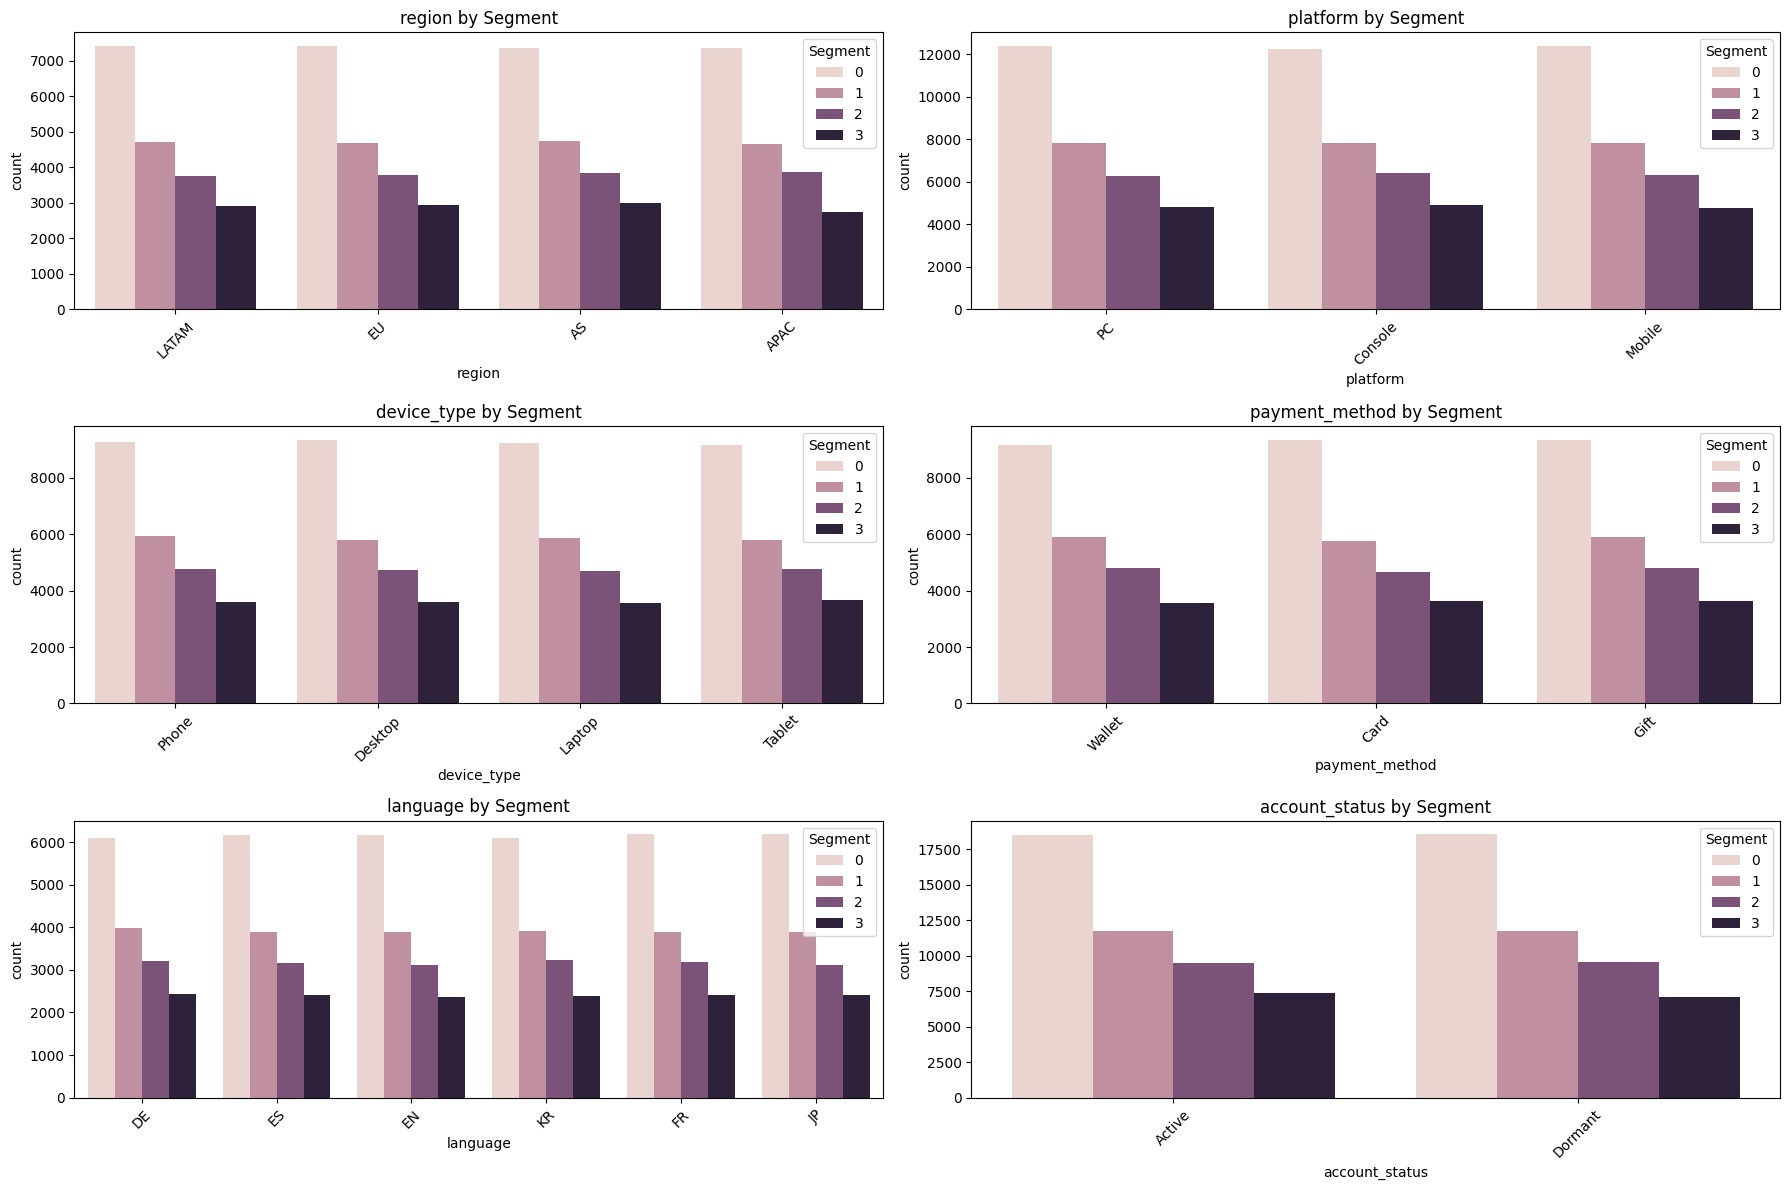

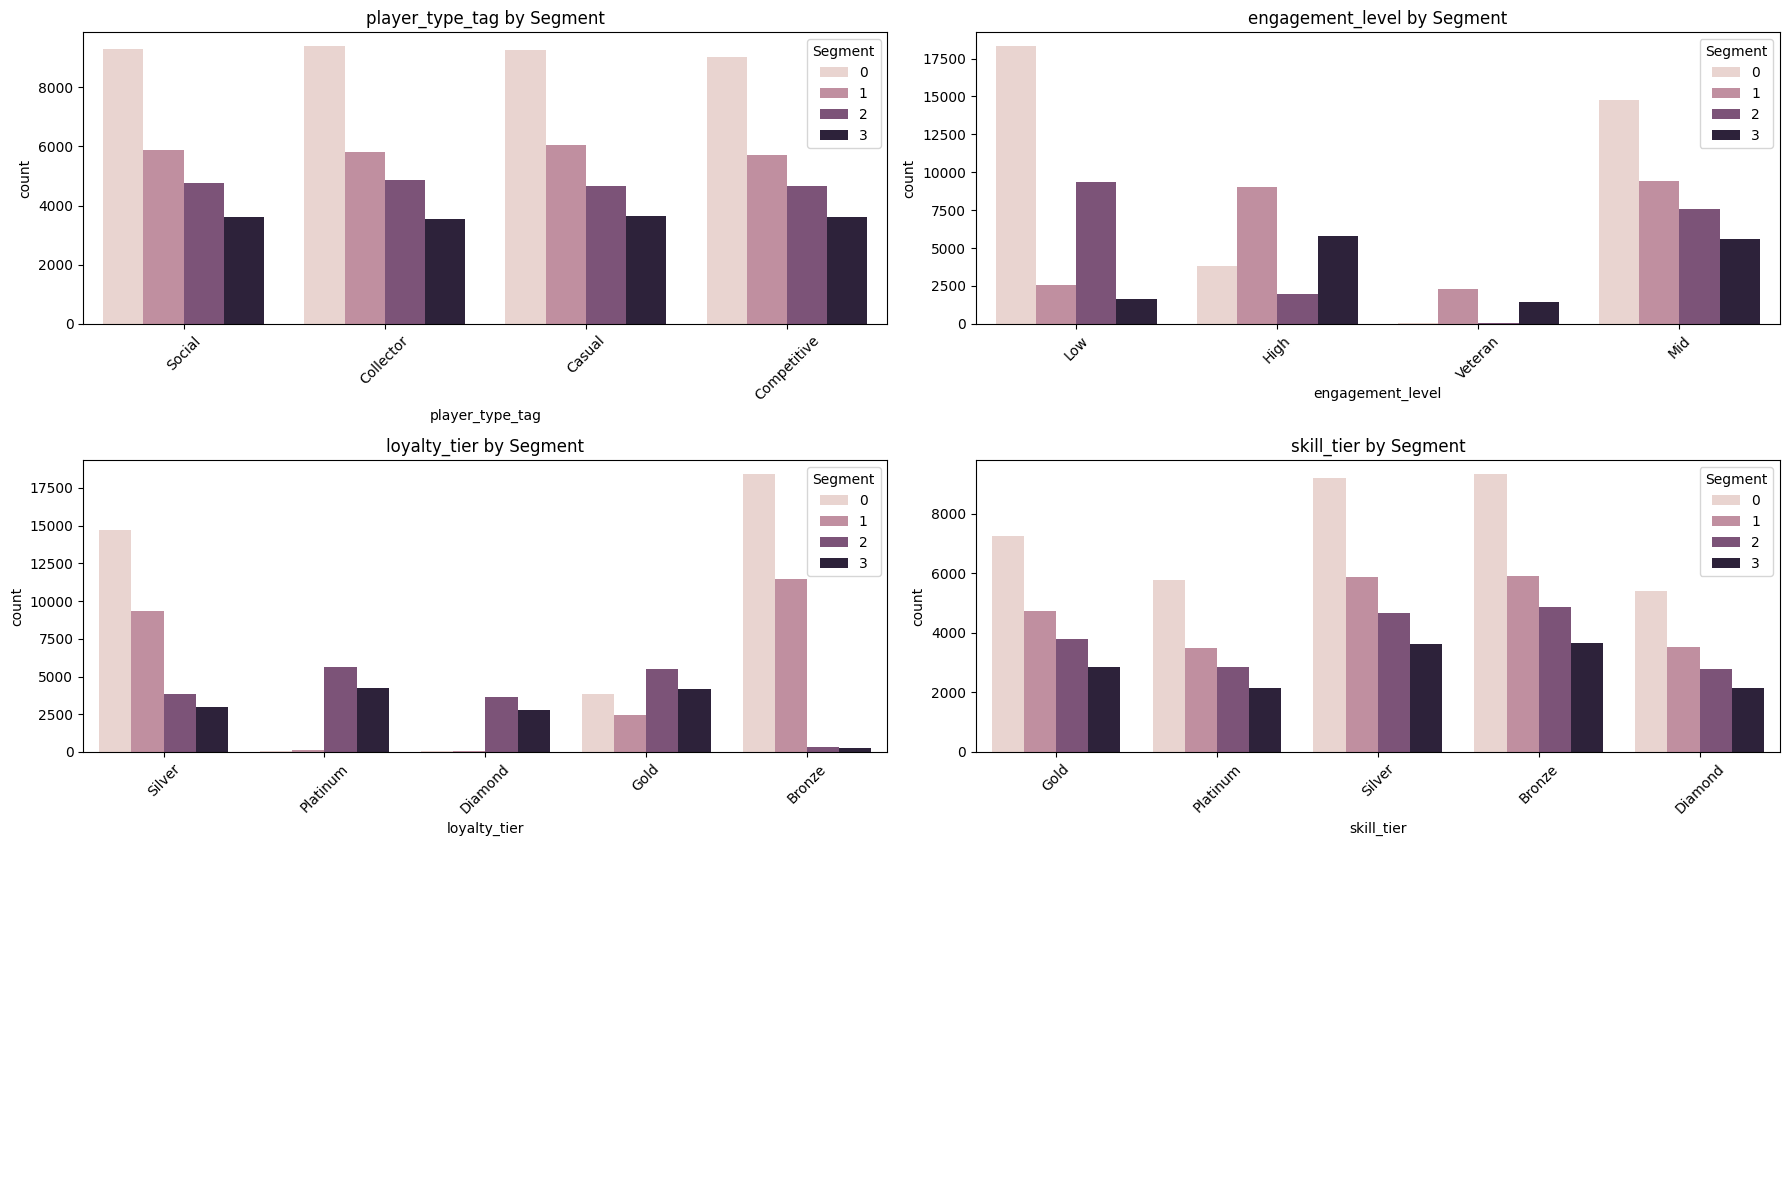

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rows, cols = 3, 2
plots_per_page = rows * cols
num_pages = math.ceil(len(categorical_features) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, len(categorical_features))
    subset = categorical_features[start:end]

    fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
    axes = axes.flatten()

    for i, feature in enumerate(subset):
        ax = axes[i]
        sns.countplot(data=df, x=feature, hue='segment', ax=ax)
        ax.set_title(f"{feature} by Segment")
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Segment')

    # Turn off unused subplots
    for j in range(len(subset), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
from scipy.stats import chi2_contingency

chi2_results = []

for feature in categorical_features:
    contingency = pd.crosstab(df[feature], df['segment'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append([feature, chi2, p, dof])

chi2_df = pd.DataFrame(chi2_results, columns=['feature', 'chi2', 'p_value', 'dof'])
chi2_df.sort_values('p_value', inplace=True)
chi2_df


feature          chi2   p_value  dof
7  engagement_level  23586.380010  0.000000    9
8      loyalty_tier  50169.569515  0.000000   12
0            region     12.993225  0.162913    9
6   player_type_tag     12.633883  0.179884    9
5    account_status      3.587292  0.309616    3
3    payment_method      6.642286  0.355198    6
9        skill_tier     12.337443  0.418974   12
1          platform      5.154178  0.524196    6
2       device_type      6.105860  0.729278    9
4          language      7.059405  0.955980   15

In [ ]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

chi2_df['cramers_v'] = [cramers_v(pd.crosstab(df[feat], df['segment']))
                        for feat in categorical_features]

chi2_df.sort_values('cramers_v', ascending=False)


feature          chi2   p_value  dof  cramers_v
2       device_type      6.105860  0.729278    9   0.421967
1          platform      5.154178  0.524196    6   0.289674
7  engagement_level  23586.380010  0.000000    9   0.007593
6   player_type_tag     12.633883  0.179884    9   0.006863
9        skill_tier     12.337443  0.418974   12   0.006703
4          language      7.059405  0.955980   15   0.006622
3    payment_method      6.642286  0.355198    6   0.006180
8      loyalty_tier  50169.569515  0.000000   12   0.005237
5    account_status      3.587292  0.309616    3   0.005010
0            region     12.993225  0.162913    9   0.004657

<Figure size 1000x600 with 0 Axes>

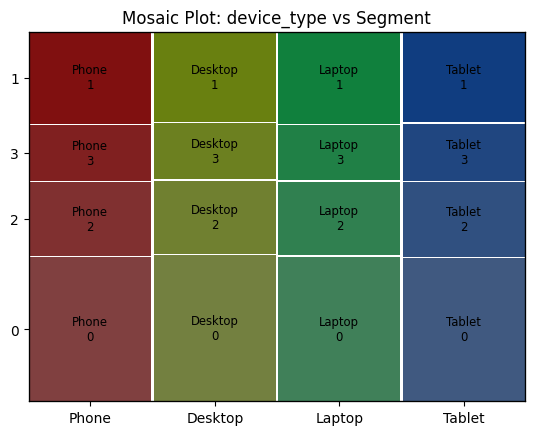

<Figure size 1000x600 with 0 Axes>

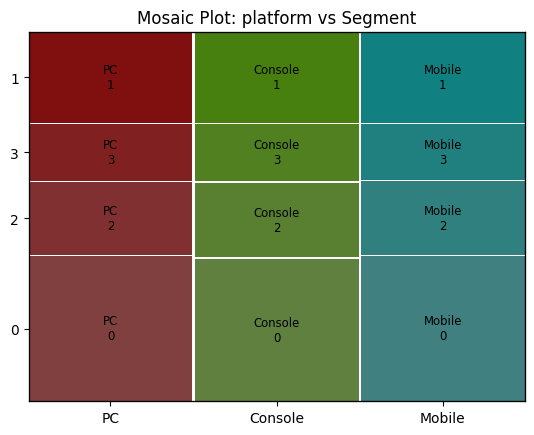

<Figure size 1000x600 with 0 Axes>

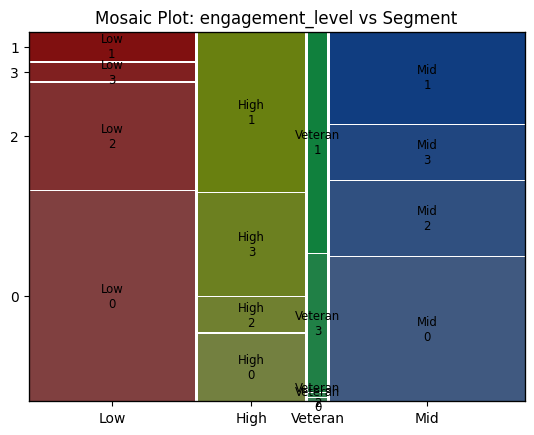

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

top_categorical = chi2_df.sort_values('cramers_v', ascending=False)['feature'].head(3)

for feature in top_categorical:
    plt.figure(figsize=(10,6))
    mosaic(df, [feature, 'segment'])
    plt.title(f"Mosaic Plot: {feature} vs Segment")
    plt.show()


## Overall Data Characteristics and Missing Values

- **Dataset Overview**
  - Use `df.info()`, `df.describe().T`, and `df.isnull().sum()` to examine:
    - Data structure
    - Data types
    - Extent of missing values
  - Key notes:
    - `'id'` and `'player_id'` are identifiers.
    - `'segment'` is the target variable.
    - Many features have significant missing values (~7k–8k).
    - `'region'` and `'payment_method'` have even more missing values.

## Continuous Feature Relationships with Target

- **Analysis Methods**
  - ANOVA and eta-squared results
  - Boxplots, violin plots, KDE plots

- **Strong Predictive Continuous Features**
  - `vip_tier`
  - `spending_frequency`
  - `avg_monthly_spending`
  - `days_since_last_login`
  - `total_spending_thb`
  - `total_playtime_hours`
  - `rare_items_count`
  - `avg_session_duration`
  - `gifts_sent_received`
  - `friend_invites_sent`
  - `play_frequency`
  - `peak_concurrent_hours`
  - `login_streak`
  - `speed_of_progression`
  - `tournament_entries`
  - `chat_activity_score`
  - `friend_count`
  
- **Insights**
  - Features with high eta-squared values show strong differentiation across segments.
  - Plots demonstrate clear distribution differences, making these features strong predictors.

## Categorical Feature Relationships with Target

- **Analysis Methods**
  - Value counts
  - Count plots
  - Chi-squared tests
  - Cramer’s V statistics

- **Key Predictive Categorical Features**
  - `engagement_level`
  - `loyalty_tier`
  
- **Notes**
  - Categorical features generally have weaker associations than continuous features.
  - Some inconsistencies observed in Cramer’s V calculation (e.g., `device_type` shows high Cramer’s V but high p-value).
  - Count plots and mosaic plots support observed relationships between categories and target.

## Key Insights for Classification

- **Feature Importance**
  - Continuous features generally more discriminative than categorical features.
  - Strong indicators: `vip_tier`, `spending_frequency`, `avg_monthly_spending`, `days_since_last_login`, playtime/spending metrics.
  - Categorical indicators: `engagement_level`, `loyalty_tier` (interpret associations carefully due to potential calculation issues).
  
- **Target Variable**
  - `'segment'` is imbalanced, with `'segment 0'` being most frequent.
  - Important to account for imbalance during model evaluation.

- **Preprocessing Considerations**
  - Significant missing data across features needs careful handling (imputation, encoding).
